# PART 1

#### Libraries

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import pandas as pd
import collections
from numpy import linalg as la
import matplotlib.pyplot as plt
import re


#### Load data into memory


In [ ]:
docs_path = 'data/farmers-protest-tweets.json.gz'

In [ ]:
original_data_tweets = pd.read_json(docs_path, lines=True, compression= 'gzip')
print("The number of tweets in the dataset is: ", len(original_data_tweets))

The number of tweets in the dataset is:  117407


In [ ]:
original_data_tweets.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24 09:23:35+00:00,The world progresses while the Indian police a...,The world progresses while the Indian police a...,1364506249291784198,"{'username': 'ArjunSinghPanam', 'displayname':...",[https://twitter.com/ravisinghka/status/136415...,[https://t.co/es3kn0IQAF],0,0,...,0,1364506249291784198,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24 09:23:32+00:00,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,"{'username': 'PrdeepNain', 'displayname': 'Pra...",[],[],0,0,...,0,1364506237451313155,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'..."
2,https://twitter.com/parmarmaninder/status/1364...,2021-02-24 09:23:22+00:00,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,1364506195453767680,"{'username': 'parmarmaninder', 'displayname': ...",[],[],0,0,...,0,1364506195453767680,pa,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,None
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:23:16+00:00,@ReallySwara @rohini_sgh watch full video here...,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,0,1364350947099484160,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S..."
4,https://twitter.com/KotiaPreet/status/13645061...,2021-02-24 09:23:10+00:00,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,1364506144002088963,"{'username': 'KotiaPreet', 'displayname': 'Pre...",[],[],0,0,...,0,1364506144002088963,und,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None


#### Extract fields Tweet | Date | Hashtags| Likes | Retweets | Url


In [ ]:
data_tweets = original_data_tweets
data_tweets.rename(columns={
    'content': 'Tweet',
    'date': 'Date',
    'likeCount': 'Likes',
    'retweetCount': 'Retweets',
    'url': 'Url',
    'lang': 'Language'
}, inplace=True)

data_tweets['Hashtags'] = data_tweets['Tweet'].apply(lambda x: [i for i in x.split() if i.startswith("#")]) # add a column for hashtags

data_tweets.head()

,Url,Date,Tweet,renderedContent,id,user,outlinks,tcooutlinks,replyCount,Retweets,...,conversationId,Language,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers,Hashtags
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24 09:23:35+00:00,The world progresses while the Indian police a...,The world progresses while the Indian police a...,1364506249291784198,"{'username': 'ArjunSinghPanam', 'displayname':...",[https://twitter.com/ravisinghka/status/136415...,[https://t.co/es3kn0IQAF],0,0,...,1364506249291784198,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '...","[#ModiDontSellFarmers, #FarmersProtest, #FreeN..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24 09:23:32+00:00,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,"{'username': 'PrdeepNain', 'displayname': 'Pra...",[],[],0,0,...,1364506237451313155,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'...","[#FarmersProtest, #ModiIgnoringFarmersDeaths, ..."
2,https://twitter.com/parmarmaninder/status/1364...,2021-02-24 09:23:22+00:00,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,1364506195453767680,"{'username': 'parmarmaninder', 'displayname': ...",[],[],0,0,...,1364506195453767680,pa,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,None,[#FarmersProtest]
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:23:16+00:00,@ReallySwara @rohini_sgh watch full video here...,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,1364350947099484160,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S...","[#farmersprotest, #NoFarmersNoFood]"
4,https://twitter.com/KotiaPreet/status/13645061...,2021-02-24 09:23:10+00:00,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,1364506144002088963,"{'username': 'KotiaPreet', 'displayname': 'Pre...",[],[],0,0,...,1364506144002088963,und,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None,"[#KisanEktaMorcha, #FarmersProtest, #NoFarmers..."


Example of tweet

In [ ]:
for i in range(1):
    print(data_tweets.iloc[i]['Tweet'])


The world progresses while the Indian police and Govt are still trying to take India back to the horrific past through its tyranny. 

@narendramodi @DelhiPolice Shame on you. 

#ModiDontSellFarmers 
#FarmersProtest 
#FreeNodeepKaur https://t.co/es3kn0IQAF


**tweet_document_ids_map**

In [ ]:
tweet_document_ids_map =  pd.read_csv("data/tweet_document_ids_map.csv")

In [ ]:
tweet_document_ids_map.head()

,docId,id
0,doc_0,1364506249291784198
1,doc_1,1364506237451313155
2,doc_2,1364506167226032128
3,doc_3,1364505991887347714
4,doc_4,1364505813834989568


In [70]:
document_id_map = dict(zip(tweet_document_ids_map['id'], tweet_document_ids_map['docId']))


#### Implement a language dictionary to process stop words depending on the language of the tweet

Given that we identified different languages among the tweets in the original data, we decided to apply stop words in the build_terms function according to their respective languages.

In [ ]:
# these are the unique larnguages in the dataset
print(original_data_tweets['Language'].unique())

['en' 'pa' 'und' 'hi' 'ta' 'hu' 'ur' 'et' 'mr' 'tl' 'es' 'de' 'in' 'or'
 'kn' 'ml' 'ht' 'it' 'fr' 'bn' 'sv' 'tr' 'gu' 'te' 'da' 'pt' 'cs' 'sl'
 'nl' 'ca' 'no' 'cy' 'pl' 'eu' 'ne' 'ru' 'lv' 'lt' 'fi' 'ro' 'ar' 'fa'
 'vi' 'is' 'ja' 'si']


In [ ]:
language_dict = {
    'ar': 'arabic',
    'eu': 'basque',
    'bn': 'bengali',
    'ca': 'catalan',
    'da': 'danish',
    'nl': 'dutch',
    'en': 'english',
    'fi': 'finnish',
    'fr': 'french',
    'de': 'german',
    'hu': 'hungarian',
    'in': 'indonesian',
    'it': 'italian',
    'ne': 'nepali',
    'no': 'norwegian',
    'pt': 'portuguese',
    'ro': 'romanian',
    'ru': 'russian',
    'es': 'spanish',
    'sv': 'swedish',
    'tr': 'turkish'
}

#### 1. Pre-process document

In [ ]:
import string
def build_terms(line, lang):

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words(lang)) # get the stop words for the language

    line = re.sub(r'http\S+', '', line)
    words_line= line.split() # tokenize the text, get a list of terms

    #First we deal with # separation
    treated_words = []
    for word in words_line:

        if word and word[0] == "#":  #If its a hashtag
            separated_list = re.split(r'(?<=[a-z])(?=[A-Z])', word[1:])
            for separated_word in separated_list:
                treated_words.append(separated_word)
        else:
            treated_words.append(word)


    line = [word.lower() for word in treated_words] # everything to lowercase
    translator = str.maketrans('', '', string.punctuation)
    line = [word.translate(translator) for word in line]  # remove punctuation

    line= [word for word in line if word not in stop_words] # remove stop_words
    line= [stemmer.stem(word) for word in line ] # steam
    line = [word for word in line if word.isalnum()]  # keeps only words with alphanumeric characters

    return line

In [ ]:
terms = build_terms("hello my #NameBrand is @john. I am a student, #student, ¢¢¢¢¢", 'english')
print(terms)

['hello', 'name', 'brand', 'john', 'student', 'student']


In [ ]:
# input: dataset of tweets, output: preprocessed dataset of tweets
# output: dataframe for each tweet content - build terms (stop words depend on the language)
def preprocess_document(tweets):
    preprocessed_document = tweets.copy() # copy to avoid modifying the original dataset

    for i in range(len(preprocessed_document)):
        twt_content = preprocessed_document.iloc[i]['Tweet']

        if preprocessed_document.iloc[i]['Language'] in language_dict:
            lang = language_dict[preprocessed_document.iloc[i]['Language']]
        else:
            lang = 'english'

        preprocessed_document.at[i, 'Tweet'] = build_terms(twt_content, lang)


    preprocessed_document = preprocessed_document[['Tweet', 'Date', 'Hashtags', 'Likes', 'Retweets', 'Url']]

    return preprocessed_document


In [ ]:
english_tweets_ids = data_tweets[data_tweets['Language'] == 'en']['id'].tolist()
print(english_tweets_ids)

[1364506249291784198, 1364506237451313155, 1364506167226032128, 1364505991887347714, 1364505813834989568, 1364505749359976448, 1364505676375076867, 1364505511073300481, 1364505452134817795, 1364505443997937669, 1364505314586951680, 1364505255946379268, 1364505170743238659, 1364505014530531330, 1364504850524995587, 1364504705460658179, 1364504358277308416, 1364504281618001921, 1364504256934408193, 1364503870651555840, 1364503539322671108, 1364503376885473282, 1364503314407124992, 1364503215232798721, 1364502921858211840, 1364502574280409091, 1364502520412930049, 1364502280167325699, 1364502000809824261, 1364501857788289027, 1364501716960354306, 1364500816418250752, 1364500655730274307, 1364500318420160513, 1364500256851951619, 1364500069945384961, 1364499897404190721, 1364499704147374082, 1364499669271855104, 1364499530515963905, 1364499513520525312, 1364499441927954434, 1364499308414967808, 1364498983813599235, 1364498954092642305, 1364498807157792770, 1364498674223513602, 136449864193

In [ ]:
data_tweets = data_tweets[data_tweets['Language'] == 'en'].reset_index(drop=True)
data_tweets.head()
processed_tweets = preprocess_document(data_tweets)
processed_tweets.head()

,Tweet,Date,Hashtags,Likes,Retweets,Url
0,"[world, progress, indian, polic, govt, still, ...",2021-02-24 09:23:35+00:00,"[#ModiDontSellFarmers, #FarmersProtest, #FreeN...",0,0,https://twitter.com/ArjunSinghPanam/status/136...
1,"[farmer, protest, modi, ignor, farmer, death, ...",2021-02-24 09:23:32+00:00,"[#FarmersProtest, #ModiIgnoringFarmersDeaths, ...",0,0,https://twitter.com/PrdeepNain/status/13645062...
2,"[reallyswara, rohinisgh, watch, full, video, f...",2021-02-24 09:23:16+00:00,"[#farmersprotest, #NoFarmersNoFood]",0,0,https://twitter.com/anmoldhaliwal/status/13645...
3,"[mandeeppunia1, watch, full, video, farmerspro...",2021-02-24 09:22:34+00:00,"[#farmersprotest, #NoFarmersNoFood]",0,0,https://twitter.com/anmoldhaliwal/status/13645...
4,"[mandeeppunia1, watch, full, video, farmerspro...",2021-02-24 09:21:51+00:00,"[#farmersprotest, #NoFarmersNoFood]",0,0,https://twitter.com/anmoldhaliwal/status/13645...


#### 2. Exploratory data analysis

In [ ]:
# input: dataset of tweets with the column 'Tweet' containing the preprocessed tweets
# output: list of lists of terms
def preprocess_tweets(lines):
      terms = []
      for line in lines:
         terms.append(line)
      return terms


In [ ]:
all_tweets_in_terms = preprocess_tweets(processed_tweets['Tweet'])
print(all_tweets_in_terms[0])

['world', 'progress', 'indian', 'polic', 'govt', 'still', 'tri', 'take', 'india', 'back', 'horrif', 'past', 'tyranni', 'narendramodi', 'delhipolic', 'shame', 'modi', 'dont', 'sell', 'farmer', 'farmer', 'protest', 'free', 'nodeep', 'kaur']


Word counting distribution

In [ ]:
def word_count_distribution(processed_tweets):
    all_words = [word for tweet in processed_tweets for word in tweet]
    word_count = collections.Counter(all_words)
    most_common_words = word_count.most_common(10)

    words, counts = zip(*most_common_words)
    plt.bar(words, counts)
    plt.xticks(rotation=90)
    plt.show()

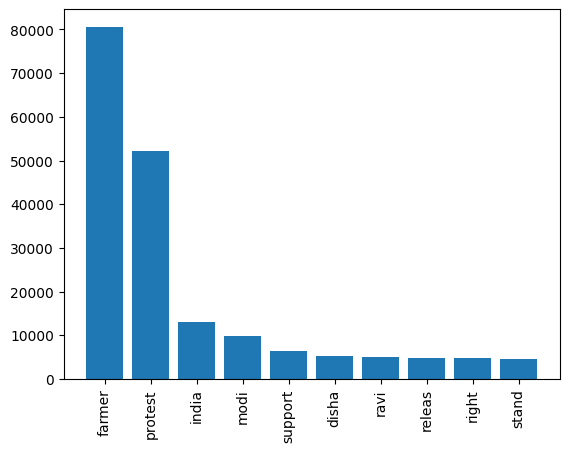

In [ ]:
word_count_distribution(all_tweets_in_terms)

Average Sentence Length

In [ ]:
def average_sentence_length(processed_tweets):
    lengths = [len(tweet) for tweet in processed_tweets]
    return sum(lengths) / len(lengths) if lengths else 0

In [ ]:
average_sentence_length(all_tweets_in_terms)

16.673067789960562

Vocabulary size

In [ ]:
def vocabulary_size(processed_terms):
    all_words = [word for tweet in processed_terms for word in tweet]
    return len(set(all_words))

In [ ]:
vocabulary_size(all_tweets_in_terms)

36230

Ranking of the most retweeted tweets

In [ ]:
def top_retweeted_tweets(data_tweets, top_n):
    # Sort by retweetCount in descending order and select the top N tweets
    top_retweets = data_tweets.sort_values(by='Retweets', ascending=False).head(top_n)

    # Extract relevant fields: content, retweet count, and tweet URL
    return top_retweets[['Tweet', 'Retweets', 'Url']]

In [ ]:
top_retweeted_tweets(data_tweets, 10)

,Tweet,Retweets,Url
3203,There's a #FarmersProtest happening in Germany...,6164,https://twitter.com/dhruv_rathee/status/136414...
38410,"disha ravi, a 21-year-old climate activist, ha...",4673,https://twitter.com/rupikaur_/status/136088206...
38012,Disha Ravi broke down in court room and told j...,3742,https://twitter.com/amaanbali/status/136090860...
46206,Farmers are so sweet. Y’all have to see this @...,3332,https://twitter.com/jedijasmin_/status/1360162...
27071,india is targeting young women to silence diss...,3230,https://twitter.com/rupikaur_/status/136179092...
45142,Bollywood has betrayed Panjab &amp; the farmer...,3182,https://twitter.com/RaviSinghKA/status/1360260...
35993,"Please, where did you get your PhD from? Anti-...",2495,https://twitter.com/sushant_says/status/136103...
9846,This is Revolution. More than 2.25lac people a...,2258,https://twitter.com/amaanbali/status/136342152...
38262,Wish you fly over the Delhi border and look at...,2208,https://twitter.com/avinashkalla/status/136089...
41472,They went after our grandparents.\n#GurmukhSin...,1933,https://twitter.com/Monica_Gill1/status/136062...


Word Clouds for the Most Frequent Words

In [ ]:
from wordcloud import WordCloud

def generate_word_clouds(all_tweets_in_terms):
    # Join all the tweets into a single string
    all_words = ' '.join([' '.join(tweet) for tweet in all_tweets_in_terms])

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()

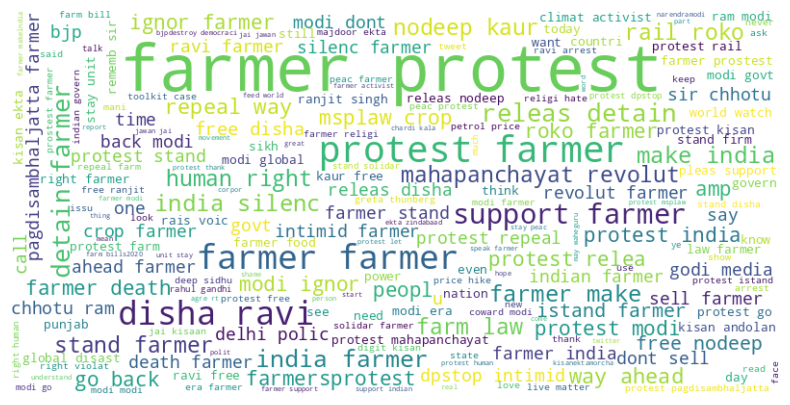

In [ ]:
generate_word_clouds(all_tweets_in_terms)

Entity Recognition

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") #in case of not having it, download through command 'python -m spacy download en_core_web_sm'

In [ ]:
def entity_recognition(data_tweets, tweet_id):

    ner_categories = ["PERSON", "ORG", "GPE"]

    doc = nlp(data_tweets[tweet_id])

    entities = []

    for ent in doc.ents:
        if ent.label_ in ner_categories:
            entities.append((ent.text, ent.label_))

    for entity, category in entities:
        print(f"{entity}: {category}")

    spacy.displacy.render(doc, style="ent")


In [ ]:
entity_recognition(data_tweets['Tweet'], 0)

Govt: ORG
India: GPE


# PART 2

## Indexing

#### Build inverted index

The next step to build our search engine is to construct the inverted index using the TF-IDF algorithm. Initially, we implemented the **"create_index_tfidf"** function from a previous lab, but it was inefficient for larger datasets. We decided to optimize the code for better performance.

In [ ]:
def create_index_tfidf(tweets_datset, num_documents):
    """
    """

    index = defaultdict(list)
    tf = defaultdict(list)  #term frequencies of terms in documents (documents in the same order as in the main index)
    df = defaultdict(int)  #document frequencies of terms in the corpus
    idf = defaultdict(float)

    for i in range(len(tweets_datset)):
        if i%1000==0:
            print(f"Procesando tweet {i + 1}/{len(tweets_datset)}")  # Muestra el progreso

        current_tweet_index = {}
        ## ===============================================================
        ## create the index for the **current page** and store it in current_page_index
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and its text is
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0,
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        for position, term in enumerate(tweets_datset.iloc[i]['Tweet']):

                try:

                    current_tweet_index[term][1].append(position)

                except:

                    current_tweet_index[term] = [document_id_map[tweets_datset.iloc[i]['id']], array('I', [position])]

        # normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, doc_positions in current_tweet_index.items():
            # posting will contain the list of positions for current term in current document.
            # posting ==> [current_doc, [list of positions]]
            # you can use it to infer the frequency of current term.
            norm += len(doc_positions[1]) ** 2
        norm = math.sqrt(norm)

            #calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, doc_positions in current_tweet_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(doc_positions[1]) / norm, 4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] += 1 # increment DF for current term

        #merge the current page index with the main index
        for term, doc_positions in current_tweet_index.items():
            index[term].append(doc_positions)

        # Compute IDF following the formula (3) above. HINT: use np.log
        for term in df:
            idf[term] = np.round(np.log(float(num_documents / df[term])), 4)

    return index, tf, df, idf


To address the performance issues, we restructured the function as follows:

In [ ]:
from collections import defaultdict, Counter
from array import array
import numpy as np
import math


num_documents = len(document_id_map)

index = defaultdict(list)
tf = defaultdict(list)
df = defaultdict(int)
idf = defaultdict(float)

# Convert 'Tweet' column to a list of lists to speed up iteration
tweets = processed_tweets['Tweet'].tolist()

# Iterate over tweets and their document IDs
for i, tweet in enumerate(tweets):
    current_tweet_index = defaultdict(lambda: [document_id_map[english_tweets_ids[i]], array('I')])
    term_counts = Counter(tweet)  # Count term frequencies in the current tweet

    # Calculate normalized term frequencies and update current_tweet_index
    norm = math.sqrt(sum((count ** 2 for count in term_counts.values())))

    for position, term in enumerate(tweet):
        current_tweet_index[term][1].append(position)  # Store position for term

    for term, (doc_id, positions) in current_tweet_index.items():
        # Calculate term frequency (TF)
        tf_value = len(positions) / norm
        tf[term].append(np.round(tf_value, 4))

        # Update document frequency (DF)
        df[term] += 1

        # Update main index
        index[term].append([doc_id, positions])

# Calculate IDF for all terms
for term in df:
    idf[term] = np.round(np.log(float(num_documents) / df[term]), 4)


#### Ranking and search

In [90]:
#Represent the query as a weighted tf-idf vector
#Represent each document as a weighted tfidf vector
#Compute the cosine similarity score for the
#query vector and each document vector
#Rank documents with respect to the query by score
#Return the top K (e.g., K = 10) to the user

def rank_documents(terms, docs, index, idf, tf):
    """
    Perform the ranking of the results of a search based on the tf-idf weights

    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title

    Returns:
    Print the list of ranked documents
    """

    # I'm interested only on the element of the docVector corresponding to the query terms
    # The remaining elements would become 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # I call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query.
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        # TODO: check how to vectorize the query
        # query_vector[termIndex]=idf[term]  # original
        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex] = query_terms_count[term] / query_norm * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, doc_positions) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # TODO: check if multiply for idf

    # Calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot

    doc_scores = [[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items()]
    doc_scores.sort(reverse=True)
    #print(doc_scores)

    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs

In [91]:
def search_tf_idf(query, index):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query,'english')
    docs = set()
    i=0
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs = [posting[0] for posting in index[term]]

            if i == 0:
                docs = set(term_docs)
                i = 1
            #docs = docs intersection term_docs
            else: docs &= set(term_docs)

        except:
            #term is not in index
            pass

    docs = list(docs)

    ranked_docs = rank_documents(query, docs, index, idf, tf)

    #print( ranked_docs)
    return ranked_docs

#### Test queries

In [ ]:
# define 5 queries to test the search engine
queries = [
    "Farmer protest",
    "Modi govt",
    "diesel price",
    "indian farmer",
    "Disha ravi"
]

In [ ]:
inverse_document_id_map = dict(zip(tweet_document_ids_map['docId'], tweet_document_ids_map['id']))

In [ ]:
all_ranked_docs = []

for query in queries:
    print(f"\nProcessing query: '{query}'")
    ranked_docs = search_tf_idf(query, index)

    top = 10

    print(f"Top {top} docs ids for query: '{query}'")
    for d_id in ranked_docs[:top]:
        print("doc_id= {}".format(d_id))


    original_ids = [inverse_document_id_map[d_id] for d_id in ranked_docs[:top]]

    original_ids = [inverse_document_id_map[d_id] for d_id in ranked_docs[:top]]
    indices = data_tweets[data_tweets['id'].isin(original_ids)].index
    tweets_finales = processed_tweets.iloc[indices]

    all_ranked_docs.append((query, tweets_finales))


    print(f"Docs info for query '{query}':")

    display(tweets_finales)



Processing query: 'Farmer protest'
Top 10 docs ids for query: 'Farmer protest'
doc_id= doc_32542
doc_id= doc_22865
doc_id= doc_7859
doc_id= doc_6060
doc_id= doc_5727
doc_id= doc_5183
doc_id= doc_46137
doc_id= doc_45189
doc_id= doc_43199
doc_id= doc_42188
Docs info for query 'Farmer protest':


,Tweet,Date,Hashtags,Likes,Retweets,Url
5183,"[farmer, protest]",2021-02-22 22:32:21+00:00,[#FarmersProtest],0,1,https://twitter.com/Rajnika78115125/status/136...
5727,"[farmer, protest, farmer, protest]",2021-02-22 16:13:08+00:00,"[#MSP_किसान_का_हक, #FarmersProtest]",0,0,https://twitter.com/JSekhupuria/status/1363884...
6060,"[farmer, protest]",2021-02-22 12:50:47+00:00,[#FarmersProtest],1,0,https://twitter.com/rwhrao_singh/status/136383...
7859,"[farmer, protest, farmer, protest]",2021-02-22 02:00:20+00:00,"[#FarmersProtests, #FarmersProtest]",0,0,https://twitter.com/Rajnika78115125/status/136...
22865,"[largest, protest, kanganateam, farmer, protes...",2021-02-17 18:28:33+00:00,"[#FarmersProtest, #FarmersProtest, #FarmersPro...",0,0,https://twitter.com/karm16200070/status/136210...
32542,"[timesnow, farmer, protest, protest, protest]",2021-02-15 14:12:46+00:00,[#FarmersProtest],0,0,https://twitter.com/45kHz/status/1361317533173...
42188,"[farmer, protest]",2021-02-13 11:18:49+00:00,[#FarmersProtest],0,0,https://twitter.com/khairaBet/status/136054898...
43199,"[farmer, protest]",2021-02-13 05:07:42+00:00,[#FarmersProtest],1,0,https://twitter.com/tash_kmb/status/1360455587...
45189,"[farmer, protest]",2021-02-12 15:58:08+00:00,[#FarmersProtest],3,1,https://twitter.com/Manpree52519810/status/136...
46137,"[farmer, protest]",2021-02-12 10:08:02+00:00,[#FarmersProtest],1,1,https://twitter.com/Parikau16692134/status/136...



Processing query: 'Modi govt'
Top 10 docs ids for query: 'Modi govt'
doc_id= doc_30979
doc_id= doc_32524
doc_id= doc_32236
doc_id= doc_4021
doc_id= doc_31725
doc_id= doc_32016
doc_id= doc_35049
doc_id= doc_32570
doc_id= doc_30292
doc_id= doc_28222
Docs info for query 'Modi govt':


,Tweet,Date,Hashtags,Likes,Retweets,Url
4021,"[think, modi, govt, wors, british, govt, pagdi...",2021-02-23 04:33:50+00:00,"[#Pagdi_Sambhal_Jatta, #FarmersProtest]",0,0,https://twitter.com/777sattiSingh/status/13640...
28222,"[farmer, protest, india, domest, affairsupport...",2021-02-16 15:13:34+00:00,"[#FarmersProtest, #ToolkitCase]",0,0,https://twitter.com/umakantsingh_IN/status/136...
30292,"[shame, india, govt, modi, fuel, scam, iam, mo...",2021-02-16 04:12:17+00:00,"[#ModiFuelScam, #IamAgainstModiGovt, #PetrolDi...",4,7,https://twitter.com/nishamirok/status/13615288...
30979,"[govt, dictatorship, iam, modi, govt, farmer, ...",2021-02-16 01:03:08+00:00,"[#IamAgainstModiGovt, #FarmersProtest]",0,0,https://twitter.com/Sahibpreet1111/status/1361...
31725,"[govt, go, dilut, polic, total, salwa, judum, ...",2021-02-15 18:39:34+00:00,"[#farmers!, #IamAgainstModiGovt, #FarmersProtest]",0,1,https://twitter.com/umakantsingh_IN/status/136...
32016,"[strictli, condemn, unlaw, action, modi, govt,...",2021-02-15 16:45:03+00:00,"[#FarmersProtest, #IamAgainstModiGovt]",2,0,https://twitter.com/AmrinderS_13/status/136135...
32236,"[shame, india, govt, iam, modi, govt, farmer, ...",2021-02-15 15:42:31+00:00,"[#IndiaGovt., #IamAgainstModiGovt, #FarmersPro...",0,0,https://twitter.com/legendjatt007/status/13613...
32524,"[im, modi, govt, india, threat, undeclar, emer...",2021-02-15 14:18:51+00:00,"[#IamAgainstModiGovt, #farmersprotest]",8,13,https://twitter.com/PrinceR98409311/status/136...
32570,"[world, modi, govt, hate, passion, sing, song,...",2021-02-15 14:01:51+00:00,"[#FarmersProtest, #IamAgainstModiGovt]",66,56,https://twitter.com/iMani_KaurRai/status/13613...
35049,"[shame, act, modi, govt, india, silenc, farmer...",2021-02-15 02:46:08+00:00,"[#IndiaBeingSilenced, #FarmersProtest, #ShameO...",0,1,https://twitter.com/JSMaan18/status/1361144734...



Processing query: 'diesel price'
Top 10 docs ids for query: 'diesel price'
doc_id= doc_12933
doc_id= doc_28458
doc_id= doc_20756
doc_id= doc_27520
doc_id= doc_27290
doc_id= doc_12511
doc_id= doc_12825
doc_id= doc_29721
doc_id= doc_28119
doc_id= doc_41265
Docs info for query 'diesel price':


,Tweet,Date,Hashtags,Likes,Retweets,Url
12511,"[myogiadityanath, takefarmlawsback, farmerspro...",2021-02-20 12:05:50+00:00,"[#takefarmlawsback, #farmersprotest, #standwit...",0,0,https://twitter.com/chahalcs28/status/13630975...
12825,"[thursday, went, past, mark, madhya, pradesh, ...",2021-02-20 10:05:21+00:00,"[#PetrolDieselPriceHike, #PetrolPrice, #Petrol...",1,1,https://twitter.com/abuzargaffarisr/status/136...
12933,"[bjp, rule, state, better, control, price, pet...",2021-02-20 09:12:34+00:00,"[#BJP, #Petrol, #Diesel, #ModiHaiToMehngaiHai,...",2,0,https://twitter.com/suneet7954/status/13630539...
20756,"[month, farmer, protest, peopl, petrol100, pro...",2021-02-18 07:10:45+00:00,"[#FarmersProtest, #petrol100, #BJP, #Days, #di...",2,0,https://twitter.com/RishabRath/status/13622984...
27290,"[ashey, din, petrol, diesel, price, hike, farm...",2021-02-16 20:01:20+00:00,"[#PetrolDieselPriceHike, #FarmersProtest]",1,0,https://twitter.com/Majhakisansang1/status/136...
27520,"[farmer, protest, petrol, diesel, price, hike]",2021-02-16 18:46:37+00:00,"[#FarmersProtest, #PetrolDieselPriceHike]",0,0,https://twitter.com/sangharusski/status/136174...
28119,"[godi, media, explain, petrol, diesel, price, ...",2021-02-16 15:49:47+00:00,"[#Godi, #Explained:, #Petrol,, #Diesel, #Modi,...",0,0,https://twitter.com/Shahidlived/status/1361704...
28458,"[petrol, diesel, price, hike, diesel, also, sc...",2021-02-16 13:53:04+00:00,"[#PetrolDieselPriceHike, ##FarmersProtest, #Pe...",2,0,https://twitter.com/ranjit1442/status/13616749...
29721,"[andhbhakt, like, petrol, price, hike, petrol,...",2021-02-16 06:16:40+00:00,"[#Andhbhakts, #PetrolPriceHike, #PetrolDieselP...",0,0,https://twitter.com/Gurjot20523956/status/1361...
41265,"[give, best, price, petrol, diesel, go, back, ...",2021-02-13 16:58:09+00:00,"[#GoBackModi, #FarmersProtest]",3,2,https://twitter.com/dinumeena73/status/1360634...



Processing query: 'indian farmer'
Top 10 docs ids for query: 'indian farmer'
doc_id= doc_30112
doc_id= doc_5374
doc_id= doc_9022
doc_id= doc_34729
doc_id= doc_30122
doc_id= doc_31839
doc_id= doc_12469
doc_id= doc_17156
doc_id= doc_40010
doc_id= doc_44653
Docs info for query 'indian farmer':


,Tweet,Date,Hashtags,Likes,Retweets,Url
5374,"[vp, dear, madam, indian, farmer, need, justic...",2021-02-22 20:12:48+00:00,[#FarmersProtest],0,0,https://twitter.com/Amandeepjohal11/status/136...
9022,"[modirojgardo, indian, youth, farmer, protest,...",2021-02-21 16:14:23+00:00,"[#modi_rojgar_do, #FarmersProtest-, #Petrol100...",2,0,https://twitter.com/Roshan575002/status/136352...
12469,"[indian, cricket, son, got, msp, mumbai, india...",2021-02-20 12:21:15+00:00,"[#MSP, #MumbaiIndians, #IPLAuctions2021, #Tool...",0,0,https://twitter.com/dapinder_brar/status/13631...
17156,"[indian, daughter, support, farmer, protest, c...",2021-02-19 07:56:29+00:00,[#FarmersProtest],0,1,https://twitter.com/karim_mewati/status/136267...
30112,"[themanikgoyalb, indian, govt, indian, system,...",2021-02-16 04:49:51+00:00,[#FarmersProtest],1,0,https://twitter.com/iRavinderSG/status/1361538...
30122,"[indian, govt, indian, system, farmer, protest...",2021-02-16 04:48:26+00:00,"[#FarmersProtest, #ReleaseDetainedFarmersAndAc...",3,0,https://twitter.com/iRavinderSG/status/1361537...
31839,"[disha, ravi, jail, indian, activist, link, gr...",2021-02-15 17:49:00+00:00,"[#FarmersProtest, #IndianInjustice]",41,14,https://twitter.com/UK51NGH/status/13613719494...
34729,"[indian, farmer, protest, matter, british, ind...",2021-02-15 04:00:26+00:00,[#FarmersProtest],2,1,https://twitter.com/manjitghuman58/status/1361...
40010,"[nandini, actorsiddharth, buy, decid, priceamb...",2021-02-13 22:45:35+00:00,[#FarmersProtest],0,0,https://twitter.com/Kamalpr70500608/status/136...
44653,"[think, indian, farmer, today, indian, farmer,...",2021-02-12 18:19:26+00:00,[#FarmersProtest],1,0,https://twitter.com/bishbishN/status/136029244...



Processing query: 'Disha ravi'
Top 10 docs ids for query: 'Disha ravi'
doc_id= doc_24045
doc_id= doc_28075
doc_id= doc_35524
doc_id= doc_35520
doc_id= doc_32720
doc_id= doc_36598
doc_id= doc_34540
doc_id= doc_24250
doc_id= doc_8824
doc_id= doc_36243
Docs info for query 'Disha ravi':


,Tweet,Date,Hashtags,Likes,Retweets,Url
8824,"[proud, disha, ravi, free, disha, ravi, farmer...",2021-02-21 17:11:55+00:00,"[#DishaRavi, #FreeDishaRavi, #FarmersProtest]",0,0,https://twitter.com/Me13015931/status/13635369...
24045,"[releasedisha, releas, disha, ravi, disha, rav...",2021-02-17 10:25:41+00:00,"[#releasedisha, #ReleaseDishaRavi, #DishaRavi,...",2,1,https://twitter.com/nikysaji/status/1361985162...
24250,"[rais, voic, disha, ravi, disha, ravi, arrest,...",2021-02-17 08:54:23+00:00,"[#DishaRaviArrest, #DishaRaviArrested, #Disha_...",3,1,https://twitter.com/ImAliQureshi/status/136196...
28075,"[farmer, protest, disha, ravi, disha, ravi, ar...",2021-02-16 16:01:37+00:00,"[#FarmersProtest, #DishaRavi, #DishaRaviArrest...",0,1,https://twitter.com/actuallyshivom/status/1361...
32720,"[dictatorship, farmersprotest, releas, disha, ...",2021-02-15 13:01:03+00:00,"[#Farmersprotest, #ReleaseDishaRavi, #DishaRavi]",4,0,https://twitter.com/aakash_du/status/136129948...
34540,"[disha, ravi, arrest, support, farmer, protest...",2021-02-15 04:34:54+00:00,"[#DishaRaviArrested, #FarmersProtest, #Release...",0,0,https://twitter.com/bijoshpv/status/1361172109...
35520,"[releas, disha, ravi, disha, ravi, farmer, pro...",2021-02-15 00:08:20+00:00,"[#शहीद_जवान_शहीद_किसान, #DishaRavi, #FarmersPr...",1,1,https://twitter.com/Baldev52633391/status/1361...
35524,"[stand, disha, ravi, disha, ravi, farmer, prot...",2021-02-15 00:04:36+00:00,"[#DishaRavi, #FarmersProtest]",1,0,https://twitter.com/Baldev52633391/status/1361...
36243,"[releas, disha, ravi, justic, disha, ravi, far...",2021-02-14 18:12:01+00:00,"[#ReleaseDishaRavi, #FarmersProtest]",1,0,https://twitter.com/MaanDee08215437/status/136...
36598,"[arrest, disha, ravi, cowardli, releas, disha,...",2021-02-14 16:44:42+00:00,"[#DishaRavi, #ReleaseDishaRavi, #FreeDishaRavi...",0,0,https://twitter.com/MannnatKaur/status/1360993...


## Evaluation

Load evaluation.csv and Parse the Ground Truth:

In [ ]:
evaluation_df = pd.read_csv("data/evaluation.csv", sep=";")
evaluation_df.head()

,docId,query_id,label
0,doc_156,1.0,0.0
1,doc_1039,1.0,0.0
2,doc_1047,1.0,1.0
3,doc_1685,1.0,0.0
4,doc_2100,1.0,1.0


In [ ]:
print_result = evaluation_df["label"].unique() # label is doc_score (1 or 0)
print_result = [x for x in print_result if str(x) != 'nan'] #last row is extra, does not contain anything
print("The ground truth of our dataset is composed of {} Relevance labels: {}".format(len(print_result), sorted(print_result)))

The ground truth of our dataset is composed of 2 Relevance labels: [0.0, 1.0]


In [ ]:
query_1_docs = evaluation_df[evaluation_df['query_id'] == 1.0]
query_2_docs = evaluation_df[evaluation_df['query_id'] == 2.0]


In [ ]:
test_queries = {
    1: "people's rights",
    2: "Indian Government"
}

In [ ]:
relevant_docs_query_1 = set(query_1_docs[query_1_docs['label'] == 1.0]['docId'].values)

retrieved_docs_query_1 = search_tf_idf(test_queries[1], index)

retrieved_docs_query_1_filtered = set([doc for doc in retrieved_docs_query_1 if doc in query_1_docs['docId'].values])

relevant_retrieved_docs = retrieved_docs_query_1_filtered.intersection(relevant_docs_query_1)

print("Relevant retrieved docs:", len(relevant_retrieved_docs))
print("Relevant not retrieved docs:", len(relevant_docs_query_1 - relevant_retrieved_docs))
print("Retrieved not relevant docs:", len(retrieved_docs_query_1_filtered - relevant_retrieved_docs))

precision= len(relevant_retrieved_docs) / len(retrieved_docs_query_1_filtered)
print("Precision:", precision)

recall = len(relevant_retrieved_docs) / len(relevant_docs_query_1)
print("Recall:", recall)

Relevant retrieved docs: 14
Relevant not retrieved docs: 1
Retrieved not relevant docs: 7
Precision: 0.6666666666666666
Recall: 0.9333333333333333


In [ ]:
relevant_docs_query_2 = set(query_2_docs[query_2_docs['label'] == 1.0]['docId'].values)

retrieved_docs_query_2 = search_tf_idf(test_queries[2], index)

retrieved_docs_query_2_filtered = set([doc for doc in retrieved_docs_query_2 if doc in query_2_docs['docId'].values])

relevant_retrieved_docs = retrieved_docs_query_2_filtered.intersection(relevant_docs_query_2)

print("Relevant retrieved docs:", len(relevant_retrieved_docs))
print("Relevant not retrieved docs:", len(relevant_docs_query_2 - relevant_retrieved_docs))
print("Retrieved not relevant docs:", len(retrieved_docs_query_2_filtered - relevant_retrieved_docs))

precision = len(relevant_retrieved_docs) / len(retrieved_docs_query_2_filtered)
print("Precision for query 2:", precision)

recall = len(relevant_retrieved_docs) / len(relevant_docs_query_2) if len(relevant_docs_query_2) > 0 else 0
print("Recall for query 2:", recall)

Relevant retrieved docs: 14
Relevant not retrieved docs: 1
Retrieved not relevant docs: 0
Precision for query 2: 1.0
Recall for query 2: 0.9333333333333333


#### Precioson@K (P@K)

In [ ]:
def precision_at_k(relevant_docs, retrieved_docs, k):
    top_k_docs = list(retrieved_docs)[:k]
    relevant_docs_in_top_k = sum(1 for doc in top_k_docs if doc in relevant_docs)
    precision = relevant_docs_in_top_k / k
    return precision

In [ ]:
precision_at_5_query_1 = precision_at_k(relevant_docs_query_1, retrieved_docs_query_1_filtered, 5)
print("Precision@5 for query 1:", precision_at_5_query_1)

precision_at_5_query_2 = precision_at_k(relevant_docs_query_2, retrieved_docs_query_2_filtered, 5)
print("Precision@5 for query 2:", precision_at_5_query_2)

Precision@5 for query 1: 0.6
Precision@5 for query 2: 1.0


#### Recall@K (R@K)

In [ ]:
def recall_at_k(relevant_docs, retrieved_docs, k):
    top_k_docs = list(retrieved_docs)[:k]
    relevant_docs_in_top_k = sum(1 for doc in top_k_docs if doc in relevant_docs)
    recall = relevant_docs_in_top_k / len(relevant_docs)
    return recall

In [ ]:
recall_at_5_query_1 = recall_at_k(relevant_docs_query_1, retrieved_docs_query_1_filtered, 5)
print("Recall@5 for query 1:", recall_at_5_query_1)

recall_at_5_query_2 = recall_at_k(relevant_docs_query_2, retrieved_docs_query_2_filtered, 5)
print("Recall@5 for query 2:", recall_at_5_query_2)

Recall@5 for query 1: 0.2
Recall@5 for query 2: 0.3333333333333333


#### Average Precision@K

In [ ]:
def average_precision_at_k(relevant_docs, retrieved_docs, k):
    retrieved_docs = list(retrieved_docs)

    precision_sum = 0.0
    relevant_count = 0

    # iterate through the top k retrieved documents
    for i in range(min(k, len(retrieved_docs))):
        if retrieved_docs[i] in relevant_docs:
            relevant_count += 1
            precision_at_i = relevant_count / (i + 1)  # i + 1 because index is 0-based
            precision_sum += precision_at_i

    # calculate average precision
    if relevant_count > 0:
        average_precision = precision_sum / relevant_count
    else:
        average_precision = 0.0

    return average_precision

In [ ]:
average_precision_at_5_query_1 = average_precision_at_k(relevant_docs_query_1, retrieved_docs_query_1_filtered, 5)
print("Average Precision@5 for query 1:", average_precision_at_5_query_1)

average_precision_at_5_query_2 = average_precision_at_k(relevant_docs_query_2, retrieved_docs_query_2_filtered, 5)
print("Average Precision@5 for query 2:", average_precision_at_5_query_2)

Average Precision@5 for query 1: 0.4777777777777777
Average Precision@5 for query 2: 1.0


#### F1-Score@K

In [ ]:
def f1_score_at_k(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [ ]:
f1_score_at_5_query_1 = f1_score_at_k(precision_at_5_query_1, recall_at_5_query_1)
print("F1 Score@5 for query 1:", f1_score_at_5_query_1)

f1_score_at_5_query_2 = f1_score_at_k(precision_at_5_query_2, recall_at_5_query_2)
print("F1 Score@5 for query 2:", f1_score_at_5_query_2)

F1 Score@5 for query 1: 0.3
F1 Score@5 for query 2: 0.5


#### Mean Average Precision (MAP)

In [ ]:
def mean_average_precision(queries, relevant_docs_dict, retrieved_docs_dict, k):
    average_precisions = []

    for query in queries:
        relevant_docs = relevant_docs_dict.get(query, set())
        retrieved_docs = retrieved_docs_dict.get(query, [])

        avg_precision = average_precision_at_k(relevant_docs, retrieved_docs, k)
        average_precisions.append(avg_precision)

    # calculate MAP
    mean_avg_precision = sum(average_precisions) / len(average_precisions) if average_precisions else 0.0

    return mean_avg_precision

In [ ]:
relevant_docs_dict = {
    1: relevant_docs_query_1,
    2: relevant_docs_query_2
}

retrieved_docs_dict = {
    1: retrieved_docs_query_1_filtered,
    2: retrieved_docs_query_2_filtered
}

map_5 = mean_average_precision(test_queries.keys(), relevant_docs_dict, retrieved_docs_dict, 5)
print("MAP@5 for the test queries:", map_5)

MAP@5 for the test queries: 0.7388888888888888


#### Mean Reciprocal Rank (MRR)

In [ ]:
def reciprocal_rank(queries, relevant_docs_dict, retrieved_docs_dict):
    reciprocal_ranks = []

    for query in queries:
        relevant_docs = relevant_docs_dict.get(query, set())
        retrieved_docs = retrieved_docs_dict.get(query, [])

        # find the rank of the first relevant document
        for rank, doc in enumerate(retrieved_docs, start=1):
            if doc in relevant_docs:
                reciprocal_ranks.append(1 / rank)
                break
        else:
            reciprocal_ranks.append(0)

    # calculate MRR
    mean_reciprocal_rank_value = sum(reciprocal_ranks) / len(reciprocal_ranks) if reciprocal_ranks else 0.0

    return mean_reciprocal_rank_value


In [ ]:
mrr = reciprocal_rank(test_queries.keys(), relevant_docs_dict, retrieved_docs_dict)
print("MRR for the test queries:", mrr)

MRR for the test queries: 0.6666666666666666


#### Normalized Discounted Cumulative Gain (NDCG)

In [ ]:
def dcg(relevance_scores):
    return sum(relevance / np.log2(idx + 1) for idx, relevance in enumerate(relevance_scores, start=1))

def ndcg(relevant_docs, retrieved_docs):
    sorted_relevant_docs = sorted(relevant_docs, key=lambda x: x[1], reverse=True)

    # create relevance scores for the retrieved documents
    relevance_scores = [0] * len(retrieved_docs)
    for idx, doc_id in enumerate(retrieved_docs):
        for relevant_doc in sorted_relevant_docs:
            if doc_id == relevant_doc[0]:
                relevance_scores[idx] = relevant_doc[1]  # set the relevance score for this doc
                break

    # calculate DCG for retrieved documents
    dcg_score = dcg(relevance_scores)

    # calculate IDCG for ideal ranking
    ideal_relevance_scores = [relevance for _, relevance in sorted_relevant_docs]
    idcg_score = dcg(ideal_relevance_scores)

    # calculate NDCG
    ndcg_score = dcg_score / idcg_score if idcg_score > 0 else 0.0

    return ndcg_score

In [ ]:
ndcg_query_1 = ndcg([(doc, 1) for doc in relevant_docs_query_1], retrieved_docs_query_1_filtered)
print("NDCG for query 1:", ndcg_query_1)

ndcg_query_2 = ndcg([(doc, 1) for doc in relevant_docs_query_2], retrieved_docs_query_2_filtered)
print("NDCG for query 2:", ndcg_query_2)

NDCG for query 1: 0.7379566858492768
NDCG for query 2: 0.9573476954303488


Evaluating our queries

For timing we have chosen our query to be is india being silenced? and we have considered relevant those with the hashtag:

In [ ]:
filtered_docs = processed_tweets[processed_tweets['Hashtags'].apply(lambda x: '#IndiaBeingSilenced' in x)]
indices_list = filtered_docs.index.tolist()
ground_truth_tweet_ids = [english_tweets_ids[i] for i in indices_list]
ground_truth_doc_ids = [document_id_map[tweet_id] for tweet_id in ground_truth_tweet_ids if tweet_id in document_id_map]


['doc_394', 'doc_438', 'doc_1259', 'doc_1775', 'doc_1787', 'doc_2020', 'doc_2050', 'doc_2415', 'doc_2420', 'doc_2433', 'doc_2523', 'doc_2651', 'doc_2653', 'doc_2764', 'doc_4141', 'doc_4249', 'doc_4277', 'doc_4799', 'doc_5149', 'doc_5301', 'doc_5453', 'doc_5796', 'doc_5816', 'doc_8207', 'doc_8411', 'doc_8575', 'doc_8694', 'doc_8791', 'doc_8841', 'doc_9111', 'doc_9928', 'doc_10016', 'doc_10029', 'doc_10156', 'doc_10372', 'doc_10571', 'doc_11142', 'doc_11197', 'doc_11247', 'doc_11283', 'doc_11877', 'doc_12308', 'doc_12962', 'doc_13150', 'doc_13430', 'doc_13503', 'doc_13568', 'doc_13642', 'doc_13730', 'doc_13735', 'doc_13965', 'doc_14038', 'doc_14083', 'doc_14124', 'doc_15065', 'doc_15066', 'doc_15267', 'doc_15800', 'doc_15853', 'doc_15894', 'doc_15983', 'doc_16219', 'doc_16223', 'doc_16228', 'doc_16646', 'doc_17005', 'doc_17035', 'doc_17071', 'doc_17110', 'doc_17220', 'doc_17244', 'doc_17259', 'doc_17266', 'doc_17349', 'doc_17775', 'doc_17781', 'doc_18035', 'doc_18550', 'doc_18614', 'doc_

## Our evaluation

In [ ]:
our_queries = {
    1: "Farmer protest",
    2: "Modi govt",
    3: "diesel price",
    4: "indian farmer",
    5: "Disha ravi"
}

In [ ]:
import pickle
with open("data/docs.pkl", "rb") as f:
    docs = pickle.load(f)

In [ ]:
# creates a data frame that contain doc_id, query_id, label
# doc_id is the id of the document in the dataset
# query_id is the id of the query (1 to 5)
# label is 1 if the document is relevant to the query, 0 otherwise

evaluation_data = []

# Iterate over each query and its key
for queryKey, query in queries.items():

    relevant_docs = search_tf_idf(query, index)

    # Iterate over each document - we will only consider the first 100 documents
    for doc in list(docs.keys())[:100]:
        label = 1 if doc in relevant_docs else 0 # label docs
        # Append the result as a dictionary to the list
        evaluation_data.append({"doc_id": doc, "query_id": queryKey, "label": label})

# Convert the list of dictionaries into a DataFrame
our_evaluation = pd.DataFrame(evaluation_data)

In [ ]:
# save our generated evaluation file
our_evaluation.to_csv("data/our_evaluation.csv", index=False)

In [ ]:
our_evaluation_file = pd.read_csv("data/our_evaluation.csv")
our_evaluation_file.head()

,doc_id,query_id,label
0,doc_0,1,1
1,doc_1,1,1
2,doc_2,1,0
3,doc_3,1,0
4,doc_4,1,0


#  **PART 3**

**TF-IDF + cosine similarity**

In [92]:
queries = [
    "Farmer protest",
    "Modi govt",
    "diesel price",
    "indian farmer",
    "Disha ravi"
]

In [93]:
all_ranked_docs = []

for query in queries:
    print(f"\nProcessing query: '{query}'")
    ranked_docs = search_tf_idf(query, index)

    top = 20

    print(f"Top {top} docs ids for query: '{query}'")
    for d_id in ranked_docs[:top]:
        print("doc_id= {}".format(d_id))


    original_ids = [inverse_document_id_map[d_id] for d_id in ranked_docs[:top]]

    original_ids = [inverse_document_id_map[d_id] for d_id in ranked_docs[:top]]
    indices = data_tweets[data_tweets['id'].isin(original_ids)].index
    tweets_finales = processed_tweets.iloc[indices]

    all_ranked_docs.append((query, tweets_finales))


    print(f"Docs info for query '{query}':")

    display(tweets_finales)



Processing query: 'Farmer protest'
Top 20 docs ids for query: 'Farmer protest'
doc_id= doc_32542
doc_id= doc_22865
doc_id= doc_7859
doc_id= doc_6060
doc_id= doc_5727
doc_id= doc_5183
doc_id= doc_46137
doc_id= doc_45189
doc_id= doc_43199
doc_id= doc_42188
doc_id= doc_41473
doc_id= doc_41062
doc_id= doc_39735
doc_id= doc_36095
doc_id= doc_33482
doc_id= doc_33280
doc_id= doc_33115
doc_id= doc_32750
doc_id= doc_3109
doc_id= doc_30242
Docs info for query 'Farmer protest':


,Tweet,Date,Hashtags,Likes,Retweets,Url
3109,"[farmer, protest]",2021-02-23 10:28:24+00:00,[#FarmersProtest],23,15,https://twitter.com/HVSBanwait/status/13641601...
5183,"[farmer, protest]",2021-02-22 22:32:21+00:00,[#FarmersProtest],0,1,https://twitter.com/Rajnika78115125/status/136...
5727,"[farmer, protest, farmer, protest]",2021-02-22 16:13:08+00:00,"[#MSP_किसान_का_हक, #FarmersProtest]",0,0,https://twitter.com/JSekhupuria/status/1363884...
6060,"[farmer, protest]",2021-02-22 12:50:47+00:00,[#FarmersProtest],1,0,https://twitter.com/rwhrao_singh/status/136383...
7859,"[farmer, protest, farmer, protest]",2021-02-22 02:00:20+00:00,"[#FarmersProtests, #FarmersProtest]",0,0,https://twitter.com/Rajnika78115125/status/136...
22865,"[largest, protest, kanganateam, farmer, protes...",2021-02-17 18:28:33+00:00,"[#FarmersProtest, #FarmersProtest, #FarmersPro...",0,0,https://twitter.com/karm16200070/status/136210...
30242,"[farmer, protest]",2021-02-16 04:22:39+00:00,[#FarmersProtest],0,0,https://twitter.com/Gurmeet55450707/status/136...
32542,"[timesnow, farmer, protest, protest, protest]",2021-02-15 14:12:46+00:00,[#FarmersProtest],0,0,https://twitter.com/45kHz/status/1361317533173...
32750,"[farmer, protest]",2021-02-15 12:48:16+00:00,[#FarmersProtest],0,0,https://twitter.com/kalecoataale/status/136129...
33115,"[farmer, protest]",2021-02-15 10:05:11+00:00,[#FarmersProtest],1,3,https://twitter.com/jeetkang92/status/13612552...



Processing query: 'Modi govt'
Top 20 docs ids for query: 'Modi govt'
doc_id= doc_30979
doc_id= doc_32524
doc_id= doc_32236
doc_id= doc_4021
doc_id= doc_31725
doc_id= doc_32016
doc_id= doc_35049
doc_id= doc_32570
doc_id= doc_30292
doc_id= doc_28222
doc_id= doc_37083
doc_id= doc_36486
doc_id= doc_33581
doc_id= doc_31961
doc_id= doc_31217
doc_id= doc_30583
doc_id= doc_29379
doc_id= doc_31787
doc_id= doc_8304
doc_id= doc_31589
Docs info for query 'Modi govt':


,Tweet,Date,Hashtags,Likes,Retweets,Url
4021,"[think, modi, govt, wors, british, govt, pagdi...",2021-02-23 04:33:50+00:00,"[#Pagdi_Sambhal_Jatta, #FarmersProtest]",0,0,https://twitter.com/777sattiSingh/status/13640...
8304,"[justice43727476, narendramodi, central, govt,...",2021-02-21 22:28:05+00:00,"[#EVMmadeModi, #BJPdestroysDemocracy, #Farmers...",0,0,https://twitter.com/UnemployedINDI8/status/136...
28222,"[farmer, protest, india, domest, affairsupport...",2021-02-16 15:13:34+00:00,"[#FarmersProtest, #ToolkitCase]",0,0,https://twitter.com/umakantsingh_IN/status/136...
29379,"[farmer, protest, india, modi, govt]",2021-02-16 08:14:55+00:00,"[#FarmersProtest, #IndiaAgainstModiGovt]",2,0,https://twitter.com/meeetgill/status/136158986...
30292,"[shame, india, govt, modi, fuel, scam, iam, mo...",2021-02-16 04:12:17+00:00,"[#ModiFuelScam, #IamAgainstModiGovt, #PetrolDi...",4,7,https://twitter.com/nishamirok/status/13615288...
30583,"[love, strong, forc, unit, fight, win, farmer,...",2021-02-16 02:59:16+00:00,"[#FarmersProtest, #IamAgainstModiGovt, #IamAga...",0,0,https://twitter.com/niteshdhaka05/status/13615...
30979,"[govt, dictatorship, iam, modi, govt, farmer, ...",2021-02-16 01:03:08+00:00,"[#IamAgainstModiGovt, #FarmersProtest]",0,0,https://twitter.com/Sahibpreet1111/status/1361...
31217,"[iam, modi, govt, love, strong, forc, unit, fi...",2021-02-15 23:04:17+00:00,"[#IamAgainstModiGovt, #FarmersProtest, #IamAga...",0,1,https://twitter.com/NadimPa11580297/status/136...
31589,"[modi, govt, follow, nazi, germani, make, modi...",2021-02-15 20:04:59+00:00,"[#ModiGovt, #Nazi, #FarmersProtest, #IamAgains...",1,0,https://twitter.com/JatinderTweets/status/1361...
31725,"[govt, go, dilut, polic, total, salwa, judum, ...",2021-02-15 18:39:34+00:00,"[#farmers!, #IamAgainstModiGovt, #FarmersProtest]",0,1,https://twitter.com/umakantsingh_IN/status/136...



Processing query: 'diesel price'
Top 20 docs ids for query: 'diesel price'
doc_id= doc_12933
doc_id= doc_28458
doc_id= doc_20756
doc_id= doc_27520
doc_id= doc_27290
doc_id= doc_12511
doc_id= doc_12825
doc_id= doc_29721
doc_id= doc_28119
doc_id= doc_41265
doc_id= doc_27603
doc_id= doc_10847
doc_id= doc_32669
doc_id= doc_6848
doc_id= doc_12885
doc_id= doc_21993
doc_id= doc_16132
doc_id= doc_16130
doc_id= doc_2698
doc_id= doc_23903
Docs info for query 'diesel price':


,Tweet,Date,Hashtags,Likes,Retweets,Url
2698,"[watch, woohooo, petrol100not, diesel, price, ...",2021-02-23 12:53:17+00:00,"[#Petrol100NotOut, #DieselPrice, #indiaonsale,...",0,0,https://twitter.com/kalaakaandi/status/1364196...
6848,"[bjpfuel, scam, petrol, price, hike, petrol, p...",2021-02-22 06:09:03+00:00,"[#BJPFuelScam, #PetrolPriceHike, #PetrolPrice,...",1,1,https://twitter.com/iWinnerJain/status/1363732...
10847,"[khalisathan, respons, increas, price, diesel,...",2021-02-21 03:36:42+00:00,"[#farmersProtest, #MSPLawForAllCrops]",0,1,https://twitter.com/Aman_dhaliwal25/status/136...
12511,"[myogiadityanath, takefarmlawsback, farmerspro...",2021-02-20 12:05:50+00:00,"[#takefarmlawsback, #farmersprotest, #standwit...",0,0,https://twitter.com/chahalcs28/status/13630975...
12825,"[thursday, went, past, mark, madhya, pradesh, ...",2021-02-20 10:05:21+00:00,"[#PetrolDieselPriceHike, #PetrolPrice, #Petrol...",1,1,https://twitter.com/abuzargaffarisr/status/136...
12885,"[petrol, refil, pack, come, soon, welcom, amba...",2021-02-20 09:39:28+00:00,"[#PetrolDieselPriceHike, #FuelPriceHike, #Petr...",3,2,https://twitter.com/Vikas_Kaha_Hai/status/1363...
12933,"[bjp, rule, state, better, control, price, pet...",2021-02-20 09:12:34+00:00,"[#BJP, #Petrol, #Diesel, #ModiHaiToMehngaiHai,...",2,0,https://twitter.com/suneet7954/status/13630539...
16130,"[govern, buy, petrol, diesel, cheapli, sell, h...",2021-02-19 16:18:08+00:00,[#FarmersProtest],1,1,https://twitter.com/JasmeenKaurBra4/status/136...
16132,"[govern, buy, petrol, diesel, cheapli, sell, h...",2021-02-19 16:17:40+00:00,[#FarmersProtest],1,0,https://twitter.com/Harry79952373/status/13627...
20756,"[month, farmer, protest, peopl, petrol100, pro...",2021-02-18 07:10:45+00:00,"[#FarmersProtest, #petrol100, #BJP, #Days, #di...",2,0,https://twitter.com/RishabRath/status/13622984...



Processing query: 'indian farmer'
Top 20 docs ids for query: 'indian farmer'
doc_id= doc_30112
doc_id= doc_5374
doc_id= doc_9022
doc_id= doc_34729
doc_id= doc_30122
doc_id= doc_31839
doc_id= doc_12469
doc_id= doc_17156
doc_id= doc_40010
doc_id= doc_44653
doc_id= doc_45221
doc_id= doc_44361
doc_id= doc_30164
doc_id= doc_29158
doc_id= doc_27391
doc_id= doc_26755
doc_id= doc_15947
doc_id= doc_14157
doc_id= doc_38314
doc_id= doc_36696
Docs info for query 'indian farmer':


,Tweet,Date,Hashtags,Likes,Retweets,Url
5374,"[vp, dear, madam, indian, farmer, need, justic...",2021-02-22 20:12:48+00:00,[#FarmersProtest],0,0,https://twitter.com/Amandeepjohal11/status/136...
9022,"[modirojgardo, indian, youth, farmer, protest,...",2021-02-21 16:14:23+00:00,"[#modi_rojgar_do, #FarmersProtest-, #Petrol100...",2,0,https://twitter.com/Roshan575002/status/136352...
12469,"[indian, cricket, son, got, msp, mumbai, india...",2021-02-20 12:21:15+00:00,"[#MSP, #MumbaiIndians, #IPLAuctions2021, #Tool...",0,0,https://twitter.com/dapinder_brar/status/13631...
14157,"[indian, queen, farmer, protest]",2021-02-20 03:45:37+00:00,[#FarmersProtest],6,0,https://twitter.com/kdhanjal12/status/13629716...
15947,"[indian, govern, work, super, rich, indian, pe...",2021-02-19 17:27:38+00:00,"[#ReleaseDetainedFarmers, #FarmersProtest]",0,0,https://twitter.com/Mordo_Daimord/status/13628...
17156,"[indian, daughter, support, farmer, protest, c...",2021-02-19 07:56:29+00:00,[#FarmersProtest],0,1,https://twitter.com/karim_mewati/status/136267...
26755,"[support, indian, farmer, protest]",2021-02-17 00:17:16+00:00,[#FarmersProtest],0,0,https://twitter.com/Princeps_99/status/1361832...
27391,"[stand, indian, farmer, protest]",2021-02-16 19:24:11+00:00,[#FarmersProtest],0,0,https://twitter.com/JAGGMULT/status/1361758292...
29158,"[farmer, protest, real, indian]",2021-02-16 09:58:55+00:00,[#FarmersProtest],2,0,https://twitter.com/fouzi_s/status/13616160389...
30112,"[themanikgoyalb, indian, govt, indian, system,...",2021-02-16 04:49:51+00:00,[#FarmersProtest],1,0,https://twitter.com/iRavinderSG/status/1361538...



Processing query: 'Disha ravi'
Top 20 docs ids for query: 'Disha ravi'
doc_id= doc_24045
doc_id= doc_28075
doc_id= doc_35524
doc_id= doc_35520
doc_id= doc_32720
doc_id= doc_36598
doc_id= doc_34540
doc_id= doc_24250
doc_id= doc_8824
doc_id= doc_36243
doc_id= doc_36221
doc_id= doc_36199
doc_id= doc_35479
doc_id= doc_3033
doc_id= doc_29046
doc_id= doc_29033
doc_id= doc_28152
doc_id= doc_20616
doc_id= doc_18311
doc_id= doc_10331
Docs info for query 'Disha ravi':


,Tweet,Date,Hashtags,Likes,Retweets,Url
3033,"[disha, ravi, great, releas, disha, ravi, farm...",2021-02-23 10:49:33+00:00,"[#DishaRavi, #ReleaseDishaRavi, #FarmersProtest]",2,3,https://twitter.com/ekakmatra/status/136416549...
8824,"[proud, disha, ravi, free, disha, ravi, farmer...",2021-02-21 17:11:55+00:00,"[#DishaRavi, #FreeDishaRavi, #FarmersProtest]",0,0,https://twitter.com/Me13015931/status/13635369...
10331,"[disha, ravi, arrest, share, toolkit, support,...",2021-02-21 05:32:15+00:00,"[#FarmersProstests, #DishaRavi, #DishaRaviArre...",2,0,https://twitter.com/Aivinaustan/status/1363360...
18311,"[warrior, disha, ravi, releas, disha, ravi, fa...",2021-02-19 01:53:34+00:00,"[#DishaRavi, #ReleaseDishaRavi, #FarmersProtest]",12,1,https://twitter.com/PeepOfTheDay/status/136258...
20616,"[power, disha, ravi, stand, disha, ravi, farme...",2021-02-18 07:55:12+00:00,"[#DishaRavi, #StandWithDishaRavi, #FarmersProt...",1,2,https://twitter.com/PratibhaSan/status/1362309...
24045,"[releasedisha, releas, disha, ravi, disha, rav...",2021-02-17 10:25:41+00:00,"[#releasedisha, #ReleaseDishaRavi, #DishaRavi,...",2,1,https://twitter.com/nikysaji/status/1361985162...
24250,"[rais, voic, disha, ravi, disha, ravi, arrest,...",2021-02-17 08:54:23+00:00,"[#DishaRaviArrest, #DishaRaviArrested, #Disha_...",3,1,https://twitter.com/ImAliQureshi/status/136196...
28075,"[farmer, protest, disha, ravi, disha, ravi, ar...",2021-02-16 16:01:37+00:00,"[#FarmersProtest, #DishaRavi, #DishaRaviArrest...",0,1,https://twitter.com/actuallyshivom/status/1361...
28152,"[stand, disha, ravi, releas, disha, ravi, farm...",2021-02-16 15:41:57+00:00,"[#ReleaseDishaRavi, #FarmersProtest]",3,0,https://twitter.com/ankitmalikrld/status/13617...
29033,"[noth, sediti, disha, ravi, freedom, speech, v...",2021-02-16 10:47:32+00:00,"[#FarmersProtest, #FreeDishaRavi, #DishaRaviAr...",0,0,https://twitter.com/TripatRaja/status/13616282...


**Your-Score + cosine similarity**

In [ ]:
#Computing the popularity of each tweet:
Likes_entwts = data_tweets['Likes'].tolist()
Retweets_entwts = data_tweets['Retweets'].tolist()
Replies_entwts = data_tweets['replyCount'].tolist()
Number_hasthags= data_tweets['Hashtags'].apply(lambda x: len(x))
Followers_counts = data_tweets['user'].apply(lambda x: x['followersCount'] if isinstance(x, dict) and 'followersCount' in x else None).tolist()


In [ ]:

tweets_popularity = defaultdict()
for i in range(len(processed_tweets)):
    tweets_popularity[document_id_map[data_tweets['id'][i]]]= (0.85/4) * Likes_entwts[i] + (0.85/4) * Retweets_entwts[i] + (0.85/4)* Replies_entwts[i] + (0.85/4) * Number_hasthags[i] + 0.2 * Followers_counts[i]

In [ ]:
print(tweets_popularity)

defaultdict(None, {'doc_0': 121.23750000000001, 'doc_1': 3.4375, 'doc_2': 10.625000000000002, 'doc_3': 10.625000000000002, 'doc_4': 10.625000000000002, 'doc_5': 10.6875, 'doc_6': 85.825, 'doc_7': 10.625000000000002, 'doc_8': 3.6125, 'doc_9': 61.625, 'doc_10': 10.625000000000002, 'doc_11': 140.22500000000002, 'doc_12': 11.6125, 'doc_13': 3729.2500000000005, 'doc_14': 7.2125, 'doc_15': 0.2125, 'doc_16': 276.82500000000005, 'doc_17': 41.4125, 'doc_18': 106.025, 'doc_19': 106.025, 'doc_20': 140.22500000000002, 'doc_21': 12.012500000000001, 'doc_22': 106.025, 'doc_23': 1.6250000000000002, 'doc_24': 15.425, 'doc_25': 521.8125, 'doc_26': 8.8125, 'doc_27': 2.675, 'doc_28': 436.38750000000005, 'doc_29': 106.025, 'doc_30': 14.125, 'doc_31': 80.87500000000001, 'doc_32': 15.825000000000001, 'doc_33': 20230.65, 'doc_34': 66.025, 'doc_35': 1.8875000000000002, 'doc_36': 3.6125000000000003, 'doc_37': 14.075000000000001, 'doc_38': 0.4125, 'doc_39': 18.0375, 'doc_40': 29.225, 'doc_41': 13.2375, 'doc_42'

In [ ]:
def rank_documents_popularity(terms, docs, index, idf, tf,tweets_popularity):

    """
    Perform the ranking of the results of a search based on the tf-idf weights

    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title

    Returns:
    Print the list of ranked documents """

    # I'm interested only on the element of the docVector corresponding to the query terms
    # The remaining elements would become 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # I call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query.
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        # TODO: check how to vectorize the query
        # query_vector[termIndex]=idf[term]  # original
        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex] = query_terms_count[term] / query_norm * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, doc_positions) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # TODO: check if multiply for idf

    # Calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot


    #popularity-----
    doc_scores = []
    for doc, curDocVec in doc_vectors.items():

        popularity_score = tweets_popularity[doc]

        cosine_similarity = np.dot(curDocVec, query_vector)

        combined_score = 0.6 * cosine_similarity + 0.4 * popularity_score
        doc_scores.append([combined_score, doc])

    #--------------


    doc_scores.sort(reverse=True)
    #print(doc_scores)

    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_popularity(query, index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs

In [ ]:
def search_popularity(query, index):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query,'english')
    docs = set()
    i=0
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs = [posting[0] for posting in index[term]]

            if i == 0:
                docs = set(term_docs)
                i = 1
            #docs = docs intersection term_docs
            else: docs &= set(term_docs)

        except:
            #term is not in index
            pass

    docs = list(docs)

    ranked_docs = rank_documents_popularity(query, docs, index, idf, tf,tweets_popularity)

    #print( ranked_docs)
    return ranked_docs

In [ ]:
all_ranked_docs = []

for query in queries:
    print(f"\nProcessing query: '{query}'")
    ranked_docs = search_popularity(query, index)

    top = 20

    print(f"Top {top} docs ids for query: '{query}'")
    for d_id in ranked_docs[:top]:
        print("doc_id= {}".format(d_id))


    original_ids = [inverse_document_id_map[d_id] for d_id in ranked_docs[:top]]

    original_ids = [inverse_document_id_map[d_id] for d_id in ranked_docs[:top]]
    indices = data_tweets[data_tweets['id'].isin(original_ids)].index
    tweets_finales = processed_tweets.iloc[indices]

    all_ranked_docs.append((query, tweets_finales))


    print(f"Docs info for query '{query}':")

    display(tweets_finales)



Processing query: 'Farmer protest'
Top 20 docs ids for query: 'Farmer protest'
doc_id= doc_25082
doc_id= doc_37143
doc_id= doc_37068
doc_id= doc_44678
doc_id= doc_29327
doc_id= doc_39080
doc_id= doc_28262
doc_id= doc_21087
doc_id= doc_8099
doc_id= doc_37871
doc_id= doc_34280
doc_id= doc_28902
doc_id= doc_29324
doc_id= doc_46642
doc_id= doc_33861
doc_id= doc_2712
doc_id= doc_10578
doc_id= doc_12927
doc_id= doc_24824
doc_id= doc_19312
Docs info for query 'Farmer protest':


,Tweet,Date,Hashtags,Likes,Retweets,Url
2712,"[misconduct, shri, balyan, ji, stark, frustrat...",2021-02-23 12:42:23+00:00,[#FarmersProtest],3,0,https://twitter.com/BJPShivPShukla/status/1364...
8099,"[bjp4india, akalid, harsimratbad, mssirsa, aaj...",2021-02-22 01:06:25+00:00,"[#FarmersProtest, #Swaraj]",10,30,https://twitter.com/hindustanse/status/1363656...
10578,"[hello, let, talk, msp, msp, simpli, put, mini...",2021-02-21 04:18:48+00:00,"[#MSPLawForAllCrops, #FarmersProtest]",868,351,https://twitter.com/Monica_Gill1/status/136334...
12927,"[chennai, school, reportedli, land, controvers...",2021-02-20 09:15:00+00:00,"[#Chennai, #FarmersProtest]",2,0,https://twitter.com/editorji/status/1363054535...
19312,"[want, ask, indiawhi, peopl, attack, grandmoth...",2021-02-18 15:39:38+00:00,"[#askIndiawhy, #FarmersProtest]",267,158,https://twitter.com/Monica_Gill1/status/136242...
21087,"[gopalbalaji, jhasanjay, sad, wipe, continu, b...",2021-02-18 05:31:14+00:00,"[#FarmersProtest, #Mahapanchayat]",6,0,https://twitter.com/ambkcsingh/status/13622734...
24824,"[let, talk, corpor, name, pepsico, earli, 90, ...",2021-02-17 05:53:21+00:00,"[#FarmersMakeIndia, #FarmersProtest]",318,122,https://twitter.com/Monica_Gill1/status/136191...
25082,"[farmer, protest, delhi, polic, say, arrest, i...",2021-02-17 05:01:03+00:00,[#FarmersProtest],33,7,https://twitter.com/htTweets/status/1361903464...
28262,"[farmer, protest, import, toolkit, expos, 930,...",2021-02-16 14:52:41+00:00,"[#FarmersProtest, #Toolkit, #Verified, #Operat...",1373,488,https://twitter.com/saahilmenghani/status/1361...
28902,"[imag, chennaibas, student, activist, valarmat...",2021-02-16 11:30:00+00:00,"[#FarmersProtest., #FakeNews]",4,3,https://twitter.com/boomlive_in/status/1361638...



Processing query: 'Modi govt'
Top 20 docs ids for query: 'Modi govt'
doc_id= doc_33735
doc_id= doc_929
doc_id= doc_134
doc_id= doc_38167
doc_id= doc_7843
doc_id= doc_9832
doc_id= doc_945
doc_id= doc_29133
doc_id= doc_107
doc_id= doc_32783
doc_id= doc_36465
doc_id= doc_36482
doc_id= doc_36476
doc_id= doc_36474
doc_id= doc_36469
doc_id= doc_36466
doc_id= doc_36479
doc_id= doc_6001
doc_id= doc_737
doc_id= doc_23025
Docs info for query 'Modi govt':


,Tweet,Date,Hashtags,Likes,Retweets,Url
107,"[bring, chang, benefit, nation, farmer, n, stu...",2021-02-24 08:09:49+00:00,"[#FarmersProtest, #ModiDontSellFarmers, #मोदी_...",7,13,https://twitter.com/Rakeysh_nag/status/1364487...
134,"[bring, chang, benefit, nationboth, farmer, n,...",2021-02-24 07:51:58+00:00,"[#मोदी_मतलब_देश_चौपट, #FarmersProtest, #ModiDo...",2,2,https://twitter.com/Monu_yadav_/status/1364483...
737,"[bring, chang, benefit, nationboth, farmer, n,...",2021-02-24 04:20:17+00:00,"[#मोदी_मतलब_देश_चौपट, #FarmersProtest, #ModiDo...",34,103,https://twitter.com/VinodMi62447080/status/136...
929,"[bring, chang, benefit, nationboth, farmer, n,...",2021-02-24 03:31:12+00:00,"[#मोदी_मतलब_देश_चौपट, #FarmersProtest, #ModiDo...",432,914,https://twitter.com/AkshayBanga1/status/136441...
945,"[bring, chang, benefit, nation, farmer, n, stu...",2021-02-24 03:26:02+00:00,"[#FarmersProtest, #ModiDontSellFarmers, #मोदी_...",190,461,https://twitter.com/JavedMalekk/status/1364416...
6001,"[student, get, job, gdp, 239, 150, million, pe...",2021-02-22 13:27:49+00:00,"[#modi_rojgar_दो, #ModiIgnoringFarmersDeaths, ...",26,63,https://twitter.com/noor_kaur_gill/status/1363...
7843,"[never, forget, govt, treat, farmer, instead, ...",2021-02-22 02:04:32+00:00,"[#ModiIgnoringFarmersDeaths, #FarmersProtest]",3,6,https://twitter.com/meeetgill/status/136367098...
9832,"[messag, solidar, iatpl, allianc, support, far...",2021-02-21 09:39:02+00:00,"[#FarmersProtest, #IndianFarmers, #Modi, #India]",0,0,https://twitter.com/gurdipsahota/status/136342...
23025,"[full, name, disha, annappa, ravi, farmer, pro...",2021-02-17 17:25:52+00:00,"[#FarmersProtest, #AskGretaWhy, #disharavijose...",0,1,https://twitter.com/keh_ke_lega/status/1362090...
29133,"[friedrichpiet, ignor, rw, moron, modi, govt, ...",2021-02-16 10:11:05+00:00,"[#ModiGovt, #FarmersProtest]",0,0,https://twitter.com/JatinderTweets/status/1361...



Processing query: 'diesel price'
Top 20 docs ids for query: 'diesel price'
doc_id= doc_6792
doc_id= doc_85
doc_id= doc_30520
doc_id= doc_3402
Docs info for query 'diesel price':


,Tweet,Date,Hashtags,Likes,Retweets,Url
85,"[narendra, modi, stadium, god, level, megaloma...",2021-02-24 08:28:16+00:00,"[#NarendraModiStadium, #FarmersProtest, #Petro...",0,0,https://twitter.com/sid20022019/status/1364492...
3402,"[pmoindia, narendramodi, modirojgardo, chang, ...",2021-02-23 08:24:49+00:00,"[#Modi_rojgar_do, #FarmersProtest, #PetrolDies...",0,0,https://twitter.com/GossMunish/status/13641290...
6792,"[koi, rok, lo, iss, god, name, pleas, stop, wo...",2021-02-22 06:38:38+00:00,"[#NaukariDoYaDegreeWapasLo, #MSPLawForAllCrops...",1,0,https://twitter.com/AkDemocratic/status/136373...
30520,"[student, standup, comedian, activist, mayb, n...",2021-02-16 03:15:47+00:00,"[#PetrolDieselPriceHike, #FarmersProtest, #Sta...",0,0,https://twitter.com/champeklel/status/13615145...



Processing query: 'indian farmer'
Top 20 docs ids for query: 'indian farmer'
doc_id= doc_24824
doc_id= doc_22449
doc_id= doc_39527
doc_id= doc_28619
doc_id= doc_12548
doc_id= doc_37444
doc_id= doc_27472
doc_id= doc_36803
doc_id= doc_3132
doc_id= doc_42267
doc_id= doc_9832
doc_id= doc_15839
doc_id= doc_18348
doc_id= doc_36347
doc_id= doc_38580
doc_id= doc_36465
doc_id= doc_36482
doc_id= doc_36476
doc_id= doc_36474
doc_id= doc_36469
Docs info for query 'indian farmer':


,Tweet,Date,Hashtags,Likes,Retweets,Url
3132,"[analog, scrip, name, modi, co, name, bjp, pvt...",2021-02-23 10:17:33+00:00,"[#FarmersProtest, #Pagdi_Sambhal_Jatta, #AndhB...",6,6,https://twitter.com/DJSingh85016049/status/136...
9832,"[messag, solidar, iatpl, allianc, support, far...",2021-02-21 09:39:02+00:00,"[#FarmersProtest, #IndianFarmers, #Modi, #India]",0,0,https://twitter.com/gurdipsahota/status/136342...
12548,"[must, watch, oppress, indian, govt, corpor, g...",2021-02-20 11:50:43+00:00,"[#FarmersProtest,]",74,36,https://twitter.com/UK51NGH/status/13630937247...
15839,"[punjab, univers, chandigarh, student, depart,...",2021-02-19 18:22:18+00:00,[#FarmersProtest],0,0,https://twitter.com/bajwamanpreet1/status/1362...
18348,"[indian, gov, sent, hire, goon, attack, tent, ...",2021-02-19 01:47:41+00:00,"[#ReleaseDetainedFarmers, #FarmersProtest]",0,0,https://twitter.com/FinesseKid24/status/136257...
22449,"[term, gift, indian, muslim, invad, find, rath...",2021-02-17 22:03:32+00:00,[#FarmersProtest],143,36,https://twitter.com/Monica_Gill1/status/136216...
24824,"[let, talk, corpor, name, pepsico, earli, 90, ...",2021-02-17 05:53:21+00:00,"[#FarmersMakeIndia, #FarmersProtest]",318,122,https://twitter.com/Monica_Gill1/status/136191...
27472,"[student, chant, slogan, outsid, delhi, polic,...",2021-02-16 18:59:46+00:00,"[#DelhiPolice, #DishaRavi,, #farmers', #Farmer...",3,2,https://twitter.com/GJP_NETWORK/status/1361752...
28619,"[delhi, polic, crackdown, climat, action, frid...",2021-02-16 13:02:41+00:00,"[#ClimateAction, #FarmersProtest]",1,1,https://twitter.com/carbonwatchdog/status/1361...
36347,"[disha, ravi, farmer, protest, go, back, modi,...",2021-02-14 17:45:59+00:00,"[#DishaRavi, #FarmersProtest, #GoBackModi, #Bo...",5,6,https://twitter.com/chouhan_jasmeet/status/136...



Processing query: 'Disha ravi'
Top 20 docs ids for query: 'Disha ravi'
doc_id= doc_12624
doc_id= doc_37143
doc_id= doc_37068
doc_id= doc_39080
doc_id= doc_33861
doc_id= doc_36560
doc_id= doc_12904
doc_id= doc_5626
doc_id= doc_30981
doc_id= doc_36704
doc_id= doc_37347
doc_id= doc_37444
doc_id= doc_27472
doc_id= doc_37071
doc_id= doc_28066
doc_id= doc_24045
doc_id= doc_35605
doc_id= doc_25580
doc_id= doc_29322
doc_id= doc_25758
Docs info for query 'Disha ravi':


,Tweet,Date,Hashtags,Likes,Retweets,Url
5626,"[batala, student, variou, univers, stage, prot...",2021-02-22 17:11:57+00:00,"[#FarmersProtest, #FreeDishaRavi, #IStandWithD...",27,12,https://twitter.com/Sikh24/status/136389933991...
12624,"[spoke, global, figur, name, greta, thunberg, ...",2021-02-20 11:22:13+00:00,"[#farmersprotest,, #DishaRavi, #Toolkit]",328,41,https://twitter.com/ndtv/status/13630865530823...
12904,"[rahu, lie, polic, say, doesnt, know, thing, t...",2021-02-20 09:30:26+00:00,"[#FarmersProtest, #DishaRavi, #Toolkit]",9,7,https://twitter.com/indialegalmedia/status/136...
24045,"[releasedisha, releas, disha, ravi, disha, rav...",2021-02-17 10:25:41+00:00,"[#releasedisha, #ReleaseDishaRavi, #DishaRavi,...",2,1,https://twitter.com/nikysaji/status/1361985162...
25580,"[matter, name, disha, ravi, joseph, matter, fa...",2021-02-17 03:57:56+00:00,"[#FarmersProtest, #toolkits]",0,1,https://twitter.com/sumonseng/status/136188757...
25758,"[1st, time, histori, v, hav, becom, nation, an...",2021-02-17 03:33:36+00:00,"[#IndiaBeingSilenced, #DishaRavi, #FarmersProt...",0,0,https://twitter.com/HiOnMoon/status/1361881455...
27472,"[student, chant, slogan, outsid, delhi, polic,...",2021-02-16 18:59:46+00:00,"[#DelhiPolice, #DishaRavi,, #farmers', #Farmer...",3,2,https://twitter.com/GJP_NETWORK/status/1361752...
28066,"[sedit, charg, press, edit, farmersprotest, to...",2021-02-16 16:04:10+00:00,"[#farmersprotest, #DelhiPolice, #DishaRavi, #I...",1,0,https://twitter.com/Ndlotus1/status/1361707954...
29322,"[ikamalhaasan, call, arrest, disha, ravi, shoc...",2021-02-16 08:34:12+00:00,"[#DishaRavi, #dissent, #sedition., #ToolkitCas...",1,1,https://twitter.com/toi_Arunram/status/1361594...
30981,"[swedish, climat, activist, gretathunberg, twe...",2021-02-16 01:02:47+00:00,"[#DishaRavi,, #FarmersProtest]",15,11,https://twitter.com/bethejuggernaut/status/136...


**BM25**

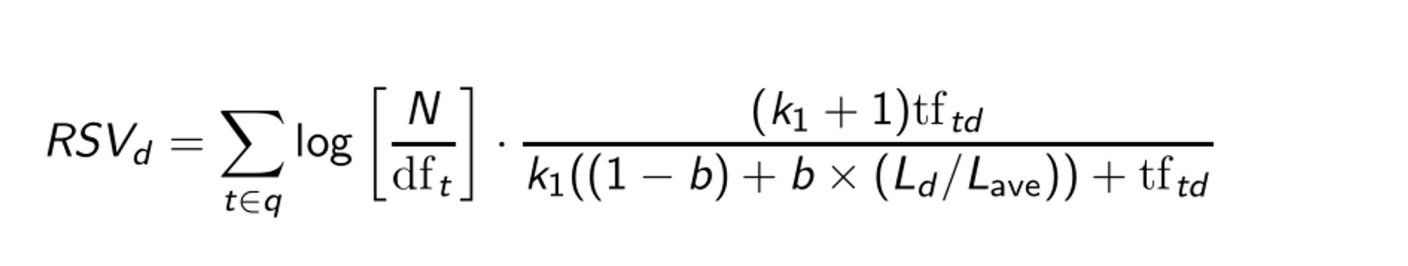

From the Retrieval Status Value formula of BM25, we can observe that we can precompute Ld (the document length) and
𝐿ave (the average document length across the entire collection) to improve efficiency. To achieve this, we create a dictionary called 'doc_length' that stores the length of each document, and we precompute the average document length based on the tweet collection.

In [ ]:
doc_length = defaultdict(float)
for i, tweet in enumerate(tweets):
    doc_length[i] = len(tweet)

In [ ]:
avg_doc_len = sum(doc_length.values())/len(doc_length)

In [ ]:
def rsv_bim_25(terms, index,docs, doc_length, avg_doc_len, idf,tf):

    """
    Computes the BM25 ranking for a list of documents and terms.

    terms: List of query terms.
    docs: List of document IDs to consider.
    doc_len: Dictionary of document lengths.
    avg_doc_len: Average document length.
    index: Inverted index mapping terms to document IDs and positions.
    idf: Inverse document frequency for each term.
    tf: Term frequency dictionary .
    """

    k1 = 1.2
    b = 0.75
    RSV_docs_scores = {doc_id: 0 for doc_id in docs}

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query

        if term not in index:
            continue

        idf_term = idf[term]

        for doc_index, (doc, doc_positions) in enumerate(index[term]):
            if doc in docs:
                K = k1* ((1-b)+ b * (doc_length[doc]/avg_doc_len))
                tf_term = tf[term][doc_index]
                RSV_term = idf_term * (((k1 + 1) * tf_term) / (K + tf_term))
                RSV_docs_scores[doc] += RSV_term

    sorted_RSV_docs = sorted(RSV_docs_scores.items(), key=lambda x: x[1], reverse=True)
    RSV_docs = [doc for doc, score in sorted_RSV_docs]

    if len(RSV_docs) == 0:
        print("No results found, try again")
        query = input()
        RSV_docs = search_bim25(query, index)

    return RSV_docs

In [ ]:
def search_bim25(query, index, doc_length, avg_doc_len, idf,tf):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query,'english')
    docs = set()

    i=0
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"

            term_docs = [posting[0] for posting in index[term]]

            if i == 0:
                docs = set(term_docs)
                i = 1

            #docs = docs intersection term_docs
            else:
                docs &= set(term_docs)

        except:
            #term is not in index
            pass

    docs = list(docs)

    ranked_docs = rsv_bim_25(query, index,docs, doc_length, avg_doc_len, idf,tf)

    #print( ranked_docs)
    return ranked_docs

In [ ]:
all_ranked_docs = []

for query in queries:
    print(f"\nProcessing query: '{query}'")
    ranked_docs = search_bim25(query, index,doc_length, avg_doc_len, idf,tf)

    top = 20

    print(f"Top {top} docs ids for query: '{query}'")
    for d_id in ranked_docs[:top]:
        print("doc_id= {}".format(d_id))


    original_ids = [inverse_document_id_map[d_id] for d_id in ranked_docs[:top]]

    original_ids = [inverse_document_id_map[d_id] for d_id in ranked_docs[:top]]
    indices = data_tweets[data_tweets['id'].isin(original_ids)].index
    tweets_finales = processed_tweets.iloc[indices]

    all_ranked_docs.append((query, tweets_finales))


    print(f"Docs info for query '{query}':")

    display(tweets_finales)


Processing query: 'Farmer protest'
Top 20 docs ids for query: 'Farmer protest'
doc_id= doc_15386
doc_id= doc_3109
doc_id= doc_6060
doc_id= doc_39735
doc_id= doc_27811
doc_id= doc_20185
doc_id= doc_17818
doc_id= doc_23104
doc_id= doc_19164
doc_id= doc_7859
doc_id= doc_36095
doc_id= doc_13054
doc_id= doc_33482
doc_id= doc_41473
doc_id= doc_30242
doc_id= doc_41062
doc_id= doc_22473
doc_id= doc_28677
doc_id= doc_32750
doc_id= doc_27726
Docs info for query 'Farmer protest':


,Tweet,Date,Hashtags,Likes,Retweets,Url
3109,"[farmer, protest]",2021-02-23 10:28:24+00:00,[#FarmersProtest],23,15,https://twitter.com/HVSBanwait/status/13641601...
6060,"[farmer, protest]",2021-02-22 12:50:47+00:00,[#FarmersProtest],1,0,https://twitter.com/rwhrao_singh/status/136383...
7859,"[farmer, protest, farmer, protest]",2021-02-22 02:00:20+00:00,"[#FarmersProtests, #FarmersProtest]",0,0,https://twitter.com/Rajnika78115125/status/136...
13054,"[farmer, protest]",2021-02-20 08:36:15+00:00,[#FarmersProtest],0,0,https://twitter.com/nonymann/status/1363044783...
15386,"[farmer, protest]",2021-02-19 20:54:49+00:00,[#FarmersProtest],3,0,https://twitter.com/Nav_malhi_26/status/136286...
17818,"[farmer, protest]",2021-02-19 03:35:49+00:00,[#FarmersProtest],0,0,https://twitter.com/torontogirl666/status/1362...
19164,"[farmer, protest]",2021-02-18 16:59:13+00:00,[#FarmersProtest],0,0,https://twitter.com/Harmeetjosan3/status/13624...
20185,"[farmer, protest]",2021-02-18 09:34:41+00:00,[#FarmersProtest],0,0,https://twitter.com/JasSinghMUFC/status/136233...
22473,"[farmer, protest]",2021-02-17 21:48:30+00:00,[#FarmersProtest],3,0,https://twitter.com/ik_stip_boeren/status/1362...
23104,"[farmer, protest, farmer, protest]",2021-02-17 16:57:58+00:00,"[#FarmersProtest, #FarmersProtests]",0,0,https://twitter.com/Kannan_Saran/status/136208...



Processing query: 'Modi govt'
Top 20 docs ids for query: 'Modi govt'
doc_id= doc_32524
doc_id= doc_30979
doc_id= doc_32016
doc_id= doc_35049
doc_id= doc_32570
doc_id= doc_32236
doc_id= doc_4021
doc_id= doc_30292
doc_id= doc_29379
doc_id= doc_30583
doc_id= doc_31217
doc_id= doc_37083
doc_id= doc_31961
doc_id= doc_33581
doc_id= doc_36486
doc_id= doc_31787
doc_id= doc_31589
doc_id= doc_4075
doc_id= doc_32009
doc_id= doc_4100
Docs info for query 'Modi govt':


,Tweet,Date,Hashtags,Likes,Retweets,Url
4021,"[think, modi, govt, wors, british, govt, pagdi...",2021-02-23 04:33:50+00:00,"[#Pagdi_Sambhal_Jatta, #FarmersProtest]",0,0,https://twitter.com/777sattiSingh/status/13640...
4075,"[modi, govt, pagdisambhaljatta, farmer, protes...",2021-02-23 04:19:21+00:00,"[#किसान_MSP_युवा_रोजगार_मांगे, #Pagdi_Sambhal_...",0,0,https://twitter.com/Preetm91/status/1364067296...
4100,"[modi, govt, pagdisambhaljatta, farmer, protes...",2021-02-23 04:17:43+00:00,"[#किसान_MSP_युवा_रोजगार_मांगे, #Pagdi_Sambhal_...",0,0,https://twitter.com/Preetm91/status/1364066886...
29379,"[farmer, protest, india, modi, govt]",2021-02-16 08:14:55+00:00,"[#FarmersProtest, #IndiaAgainstModiGovt]",2,0,https://twitter.com/meeetgill/status/136158986...
30292,"[shame, india, govt, modi, fuel, scam, iam, mo...",2021-02-16 04:12:17+00:00,"[#ModiFuelScam, #IamAgainstModiGovt, #PetrolDi...",4,7,https://twitter.com/nishamirok/status/13615288...
30583,"[love, strong, forc, unit, fight, win, farmer,...",2021-02-16 02:59:16+00:00,"[#FarmersProtest, #IamAgainstModiGovt, #IamAga...",0,0,https://twitter.com/niteshdhaka05/status/13615...
30979,"[govt, dictatorship, iam, modi, govt, farmer, ...",2021-02-16 01:03:08+00:00,"[#IamAgainstModiGovt, #FarmersProtest]",0,0,https://twitter.com/Sahibpreet1111/status/1361...
31217,"[iam, modi, govt, love, strong, forc, unit, fi...",2021-02-15 23:04:17+00:00,"[#IamAgainstModiGovt, #FarmersProtest, #IamAga...",0,1,https://twitter.com/NadimPa11580297/status/136...
31589,"[modi, govt, follow, nazi, germani, make, modi...",2021-02-15 20:04:59+00:00,"[#ModiGovt, #Nazi, #FarmersProtest, #IamAgains...",1,0,https://twitter.com/JatinderTweets/status/1361...
31787,"[iam, modi, govt, love, strong, forc, unit, fi...",2021-02-15 18:12:48+00:00,"[#IamAgainstModiGovt, #FarmersProtest, #IamAga...",11,15,https://twitter.com/ChunchuraR/status/13613779...



Processing query: 'diesel price'
Top 20 docs ids for query: 'diesel price'
doc_id= doc_12933
doc_id= doc_28458
doc_id= doc_20756
doc_id= doc_27520
doc_id= doc_27290
doc_id= doc_12511
doc_id= doc_12825
doc_id= doc_29721
doc_id= doc_41265
doc_id= doc_27603
doc_id= doc_10847
doc_id= doc_28119
doc_id= doc_32669
doc_id= doc_12885
doc_id= doc_23903
doc_id= doc_2698
doc_id= doc_16130
doc_id= doc_16132
doc_id= doc_21993
doc_id= doc_32516
Docs info for query 'diesel price':


,Tweet,Date,Hashtags,Likes,Retweets,Url
2698,"[watch, woohooo, petrol100not, diesel, price, ...",2021-02-23 12:53:17+00:00,"[#Petrol100NotOut, #DieselPrice, #indiaonsale,...",0,0,https://twitter.com/kalaakaandi/status/1364196...
10847,"[khalisathan, respons, increas, price, diesel,...",2021-02-21 03:36:42+00:00,"[#farmersProtest, #MSPLawForAllCrops]",0,1,https://twitter.com/Aman_dhaliwal25/status/136...
12511,"[myogiadityanath, takefarmlawsback, farmerspro...",2021-02-20 12:05:50+00:00,"[#takefarmlawsback, #farmersprotest, #standwit...",0,0,https://twitter.com/chahalcs28/status/13630975...
12825,"[thursday, went, past, mark, madhya, pradesh, ...",2021-02-20 10:05:21+00:00,"[#PetrolDieselPriceHike, #PetrolPrice, #Petrol...",1,1,https://twitter.com/abuzargaffarisr/status/136...
12885,"[petrol, refil, pack, come, soon, welcom, amba...",2021-02-20 09:39:28+00:00,"[#PetrolDieselPriceHike, #FuelPriceHike, #Petr...",3,2,https://twitter.com/Vikas_Kaha_Hai/status/1363...
12933,"[bjp, rule, state, better, control, price, pet...",2021-02-20 09:12:34+00:00,"[#BJP, #Petrol, #Diesel, #ModiHaiToMehngaiHai,...",2,0,https://twitter.com/suneet7954/status/13630539...
16130,"[govern, buy, petrol, diesel, cheapli, sell, h...",2021-02-19 16:18:08+00:00,[#FarmersProtest],1,1,https://twitter.com/JasmeenKaurBra4/status/136...
16132,"[govern, buy, petrol, diesel, cheapli, sell, h...",2021-02-19 16:17:40+00:00,[#FarmersProtest],1,0,https://twitter.com/Harry79952373/status/13627...
20756,"[month, farmer, protest, peopl, petrol100, pro...",2021-02-18 07:10:45+00:00,"[#FarmersProtest, #petrol100, #BJP, #Days, #di...",2,0,https://twitter.com/RishabRath/status/13622984...
21993,"[power, corpor, alreadi, start, focus, busi, a...",2021-02-18 01:59:48+00:00,"[#agriculture, #FarmersProtest, #FuelPriceHike...",0,0,https://twitter.com/jaipurautoshow/status/1362...



Processing query: 'indian farmer'
Top 20 docs ids for query: 'indian farmer'
doc_id= doc_30112
doc_id= doc_5374
doc_id= doc_9022
doc_id= doc_34729
doc_id= doc_30122
doc_id= doc_12469
doc_id= doc_31839
doc_id= doc_17156
doc_id= doc_40010
doc_id= doc_44653
doc_id= doc_45221
doc_id= doc_15947
doc_id= doc_14157
doc_id= doc_26755
doc_id= doc_27391
doc_id= doc_44361
doc_id= doc_29158
doc_id= doc_30164
doc_id= doc_35577
doc_id= doc_36696
Docs info for query 'indian farmer':


,Tweet,Date,Hashtags,Likes,Retweets,Url
5374,"[vp, dear, madam, indian, farmer, need, justic...",2021-02-22 20:12:48+00:00,[#FarmersProtest],0,0,https://twitter.com/Amandeepjohal11/status/136...
9022,"[modirojgardo, indian, youth, farmer, protest,...",2021-02-21 16:14:23+00:00,"[#modi_rojgar_do, #FarmersProtest-, #Petrol100...",2,0,https://twitter.com/Roshan575002/status/136352...
12469,"[indian, cricket, son, got, msp, mumbai, india...",2021-02-20 12:21:15+00:00,"[#MSP, #MumbaiIndians, #IPLAuctions2021, #Tool...",0,0,https://twitter.com/dapinder_brar/status/13631...
14157,"[indian, queen, farmer, protest]",2021-02-20 03:45:37+00:00,[#FarmersProtest],6,0,https://twitter.com/kdhanjal12/status/13629716...
15947,"[indian, govern, work, super, rich, indian, pe...",2021-02-19 17:27:38+00:00,"[#ReleaseDetainedFarmers, #FarmersProtest]",0,0,https://twitter.com/Mordo_Daimord/status/13628...
17156,"[indian, daughter, support, farmer, protest, c...",2021-02-19 07:56:29+00:00,[#FarmersProtest],0,1,https://twitter.com/karim_mewati/status/136267...
26755,"[support, indian, farmer, protest]",2021-02-17 00:17:16+00:00,[#FarmersProtest],0,0,https://twitter.com/Princeps_99/status/1361832...
27391,"[stand, indian, farmer, protest]",2021-02-16 19:24:11+00:00,[#FarmersProtest],0,0,https://twitter.com/JAGGMULT/status/1361758292...
29158,"[farmer, protest, real, indian]",2021-02-16 09:58:55+00:00,[#FarmersProtest],2,0,https://twitter.com/fouzi_s/status/13616160389...
30112,"[themanikgoyalb, indian, govt, indian, system,...",2021-02-16 04:49:51+00:00,[#FarmersProtest],1,0,https://twitter.com/iRavinderSG/status/1361538...



Processing query: 'Disha ravi'
Top 20 docs ids for query: 'Disha ravi'
doc_id= doc_24045
doc_id= doc_32720
doc_id= doc_35524
doc_id= doc_35520
doc_id= doc_36598
doc_id= doc_34540
doc_id= doc_28075
doc_id= doc_29046
doc_id= doc_20616
doc_id= doc_35479
doc_id= doc_10331
doc_id= doc_36243
doc_id= doc_29033
doc_id= doc_8824
doc_id= doc_28152
doc_id= doc_36199
doc_id= doc_18311
doc_id= doc_3033
doc_id= doc_36221
doc_id= doc_24250
Docs info for query 'Disha ravi':


,Tweet,Date,Hashtags,Likes,Retweets,Url
3033,"[disha, ravi, great, releas, disha, ravi, farm...",2021-02-23 10:49:33+00:00,"[#DishaRavi, #ReleaseDishaRavi, #FarmersProtest]",2,3,https://twitter.com/ekakmatra/status/136416549...
8824,"[proud, disha, ravi, free, disha, ravi, farmer...",2021-02-21 17:11:55+00:00,"[#DishaRavi, #FreeDishaRavi, #FarmersProtest]",0,0,https://twitter.com/Me13015931/status/13635369...
10331,"[disha, ravi, arrest, share, toolkit, support,...",2021-02-21 05:32:15+00:00,"[#FarmersProstests, #DishaRavi, #DishaRaviArre...",2,0,https://twitter.com/Aivinaustan/status/1363360...
18311,"[warrior, disha, ravi, releas, disha, ravi, fa...",2021-02-19 01:53:34+00:00,"[#DishaRavi, #ReleaseDishaRavi, #FarmersProtest]",12,1,https://twitter.com/PeepOfTheDay/status/136258...
20616,"[power, disha, ravi, stand, disha, ravi, farme...",2021-02-18 07:55:12+00:00,"[#DishaRavi, #StandWithDishaRavi, #FarmersProt...",1,2,https://twitter.com/PratibhaSan/status/1362309...
24045,"[releasedisha, releas, disha, ravi, disha, rav...",2021-02-17 10:25:41+00:00,"[#releasedisha, #ReleaseDishaRavi, #DishaRavi,...",2,1,https://twitter.com/nikysaji/status/1361985162...
24250,"[rais, voic, disha, ravi, disha, ravi, arrest,...",2021-02-17 08:54:23+00:00,"[#DishaRaviArrest, #DishaRaviArrested, #Disha_...",3,1,https://twitter.com/ImAliQureshi/status/136196...
28075,"[farmer, protest, disha, ravi, disha, ravi, ar...",2021-02-16 16:01:37+00:00,"[#FarmersProtest, #DishaRavi, #DishaRaviArrest...",0,1,https://twitter.com/actuallyshivom/status/1361...
28152,"[stand, disha, ravi, releas, disha, ravi, farm...",2021-02-16 15:41:57+00:00,"[#ReleaseDishaRavi, #FarmersProtest]",3,0,https://twitter.com/ankitmalikrld/status/13617...
29033,"[noth, sediti, disha, ravi, freedom, speech, v...",2021-02-16 10:47:32+00:00,"[#FarmersProtest, #FreeDishaRavi, #DishaRaviAr...",0,0,https://twitter.com/TripatRaja/status/13616282...


In [65]:
data_tweets.head()

,Url,Date,Tweet,renderedContent,id,user,outlinks,tcooutlinks,replyCount,Retweets,...,conversationId,Language,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers,Hashtags
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24 09:23:35+00:00,The world progresses while the Indian police a...,The world progresses while the Indian police a...,1364506249291784198,"{'username': 'ArjunSinghPanam', 'displayname':...",[https://twitter.com/ravisinghka/status/136415...,[https://t.co/es3kn0IQAF],0,0,...,1364506249291784198,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '...","[#ModiDontSellFarmers, #FarmersProtest, #FreeN..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24 09:23:32+00:00,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,"{'username': 'PrdeepNain', 'displayname': 'Pra...",[],[],0,0,...,1364506237451313155,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'...","[#FarmersProtest, #ModiIgnoringFarmersDeaths, ..."
2,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:23:16+00:00,@ReallySwara @rohini_sgh watch full video here...,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,1364350947099484160,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S...","[#farmersprotest, #NoFarmersNoFood]"
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:22:34+00:00,@mandeeppunia1 watch full video here https://t...,@mandeeppunia1 watch full video here youtu.be/...,1364505991887347714,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,1364428985074032646,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ...","[#farmersprotest, #NoFarmersNoFood]"
4,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:21:51+00:00,@mandeeppunia1 watch full video here https://t...,@mandeeppunia1 watch full video here youtu.be/...,1364505813834989568,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,1364480983995584515,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ...","[#farmersprotest, #NoFarmersNoFood]"


**2.word2vec + cosine similarity**

In [84]:
mapped_docs = data_tweets['id'].apply(lambda x: document_id_map.get(x, 'Documento no encontrado'))
docs = dict(zip(mapped_docs, processed_tweets['Tweet']))

In [85]:
import numpy as np
from gensim.models import Word2Vec  
from sklearn.metrics.pairwise import cosine_similarity


word2vec_model = Word2Vec(tweets, window=5, min_count=5)


def tweet2vec(tokens, word2vec_model):
    """
    Generate the average word vector for a list of tokens using a pre-trained Word2Vec model.
    """
    valid_vectors = []

    for token in tokens:
        if token in word2vec_model.wv:  
            valid_vectors.append(word2vec_model.wv[token])

    if not valid_vectors: 
        return np.zeros(word2vec_model.vector_size)

    return np.mean(valid_vectors, axis=0)

def generate_tweet_vectors(docs, word2vec_model):
    """
    Generate a dictionary with tweet_id as key and the tweet's averaged word vector as value.
    """
    tweet_vectors = {}

    for tweet_id, tokens in docs.items():
        tweet_vectors[tweet_id] = tweet2vec(tokens, word2vec_model)

    return tweet_vectors

def search_word2vec(query, tweet_vectors, top_n=20):
    """
    Given a query, find the top-n most similar tweets using cosine similarity with word2vec vectors.
    """
    query_tokens = build_terms(query, 'english')
    query_vector = tweet2vec(query_tokens, word2vec_model)

    similarity_scores = []

    for tweet_id, tweet_vector in tweet_vectors.items():
        score = cosine_similarity([query_vector], [tweet_vector])[0][0]  # Cosine similarity
        similarity_scores.append((score, tweet_id))

    top_tweets = sorted(similarity_scores, reverse=True, key=lambda x: x[0])[:top_n]
    return [tweet_id for _, tweet_id in top_tweets]






In [86]:
tweet_vectors = generate_tweet_vectors(docs, word2vec_model)

# Retrieve top 20 documents for each query
queries = [
    "Farmer protest",
    "Modi govt",
    "diesel price",
    "indian farmer",
    "Disha ravi"
]
top_20_results = {query: search_word2vec(query, tweet_vectors) for query in queries}

for query, top_docs in top_20_results.items():
    print(f"Top 20 documents for query '{query}':\n {top_docs}")

Top 20 documents for query 'Farmer protest':
 ['doc_1805', 'doc_2086', 'doc_2322', 'doc_3109', 'doc_5183', 'doc_5727', 'doc_6060', 'doc_6083', 'doc_6906', 'doc_7859', 'doc_8453', 'doc_8699', 'doc_8733', 'doc_8737', 'doc_9087', 'doc_10227', 'doc_11715', 'doc_13054', 'doc_14435', 'doc_15276']
Top 20 documents for query 'Modi govt':
 ['doc_30979', 'doc_32016', 'doc_32524', 'doc_28763', 'doc_32184', 'doc_29524', 'doc_31589', 'doc_41196', 'doc_32236', 'doc_32009', 'doc_4021', 'doc_33276', 'doc_31725', 'doc_6993', 'doc_31623', 'doc_33581', 'doc_36486', 'doc_37083', 'doc_32570', 'doc_399']
Top 20 documents for query 'diesel price':
 ['doc_11679', 'doc_11678', 'doc_11677', 'doc_11687', 'doc_22905', 'doc_29721', 'doc_22779', 'doc_28458', 'doc_5892', 'doc_6848', 'doc_12933', 'doc_27290', 'doc_29641', 'doc_42204', 'doc_27520', 'doc_29570', 'doc_7119', 'doc_21993', 'doc_37826', 'doc_12825']
Top 20 documents for query 'indian farmer':
 ['doc_44653', 'doc_8345', 'doc_35438', 'doc_36000', 'doc_45221'

In [87]:
doc_ids_query1 = ['doc_1805', 'doc_2086', 'doc_2322', 'doc_3109', 'doc_5183', 'doc_5727', 'doc_6060', 'doc_6083', 'doc_6906', 'doc_7859', 'doc_8453', 'doc_8699', 'doc_8733', 'doc_8737', 'doc_9087', 'doc_10227', 'doc_11715', 'doc_13054', 'doc_14435', 'doc_15276']
for doc_id in doc_ids_query1:
    print(docs[doc_id])

['japnamkaur', 'hon', 'farmer', 'protest']
['offcours', 'farmer', 'protest']
['jaskirxt', 'farmer', 'protest']
['farmer', 'protest']
['farmer', 'protest']
['farmer', 'protest', 'farmer', 'protest']
['farmer', 'protest']
['barnal', 'farmer', 'protest']
['farmer', 'protest', 'ade', 'jhade']
['farmer', 'protest', 'farmer', 'protest']
['jyoti09233676', 'sahibsi39465273', 'yrr', 'farmer', 'protest']
['farmerprotestsbustingmythmodiomnisci', 'farmer', 'protest']
['farmerprotestsbustingmythmodiomnisci', 'farmer', 'protest']
['ohhooo', 'farmer', 'protest']
['farmer', 'protest', 'gutsi']
['narayananand3', 'profmkay', 'srinivazvasu', 'farmer', 'protest']
['wholesom', 'farmer', 'protest']
['farmer', 'protest']
['incakht', 'farmer', 'protest']
['farmer', 'protest']
